<a href="https://colab.research.google.com/github/DrueStaples08/Heart_Disease/blob/master/Heart_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gather Data and Tools

###Import Packages

In [0]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import pandas_profiling
from numpy import savetxt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from IPython.core.display import HTML 

In [0]:
#import scipy
#scipy.test()

In [0]:
%matplotlib inline

###Upload File to Notebook

In [0]:
dff = pd.read_csv('heart_disease_uci.csv')

#Data Preperation


*   Explore the data set
*   Feature Engineering
*   Feature Selection
*   Split and Scale Data Set



###Explore the data set

In [0]:
df = dff
df.head()
#categorical feautures include: sex, cp, fbs, restecg, exang, slope, ca, thal
#also you need to scale your features BEFORE using feature selection

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


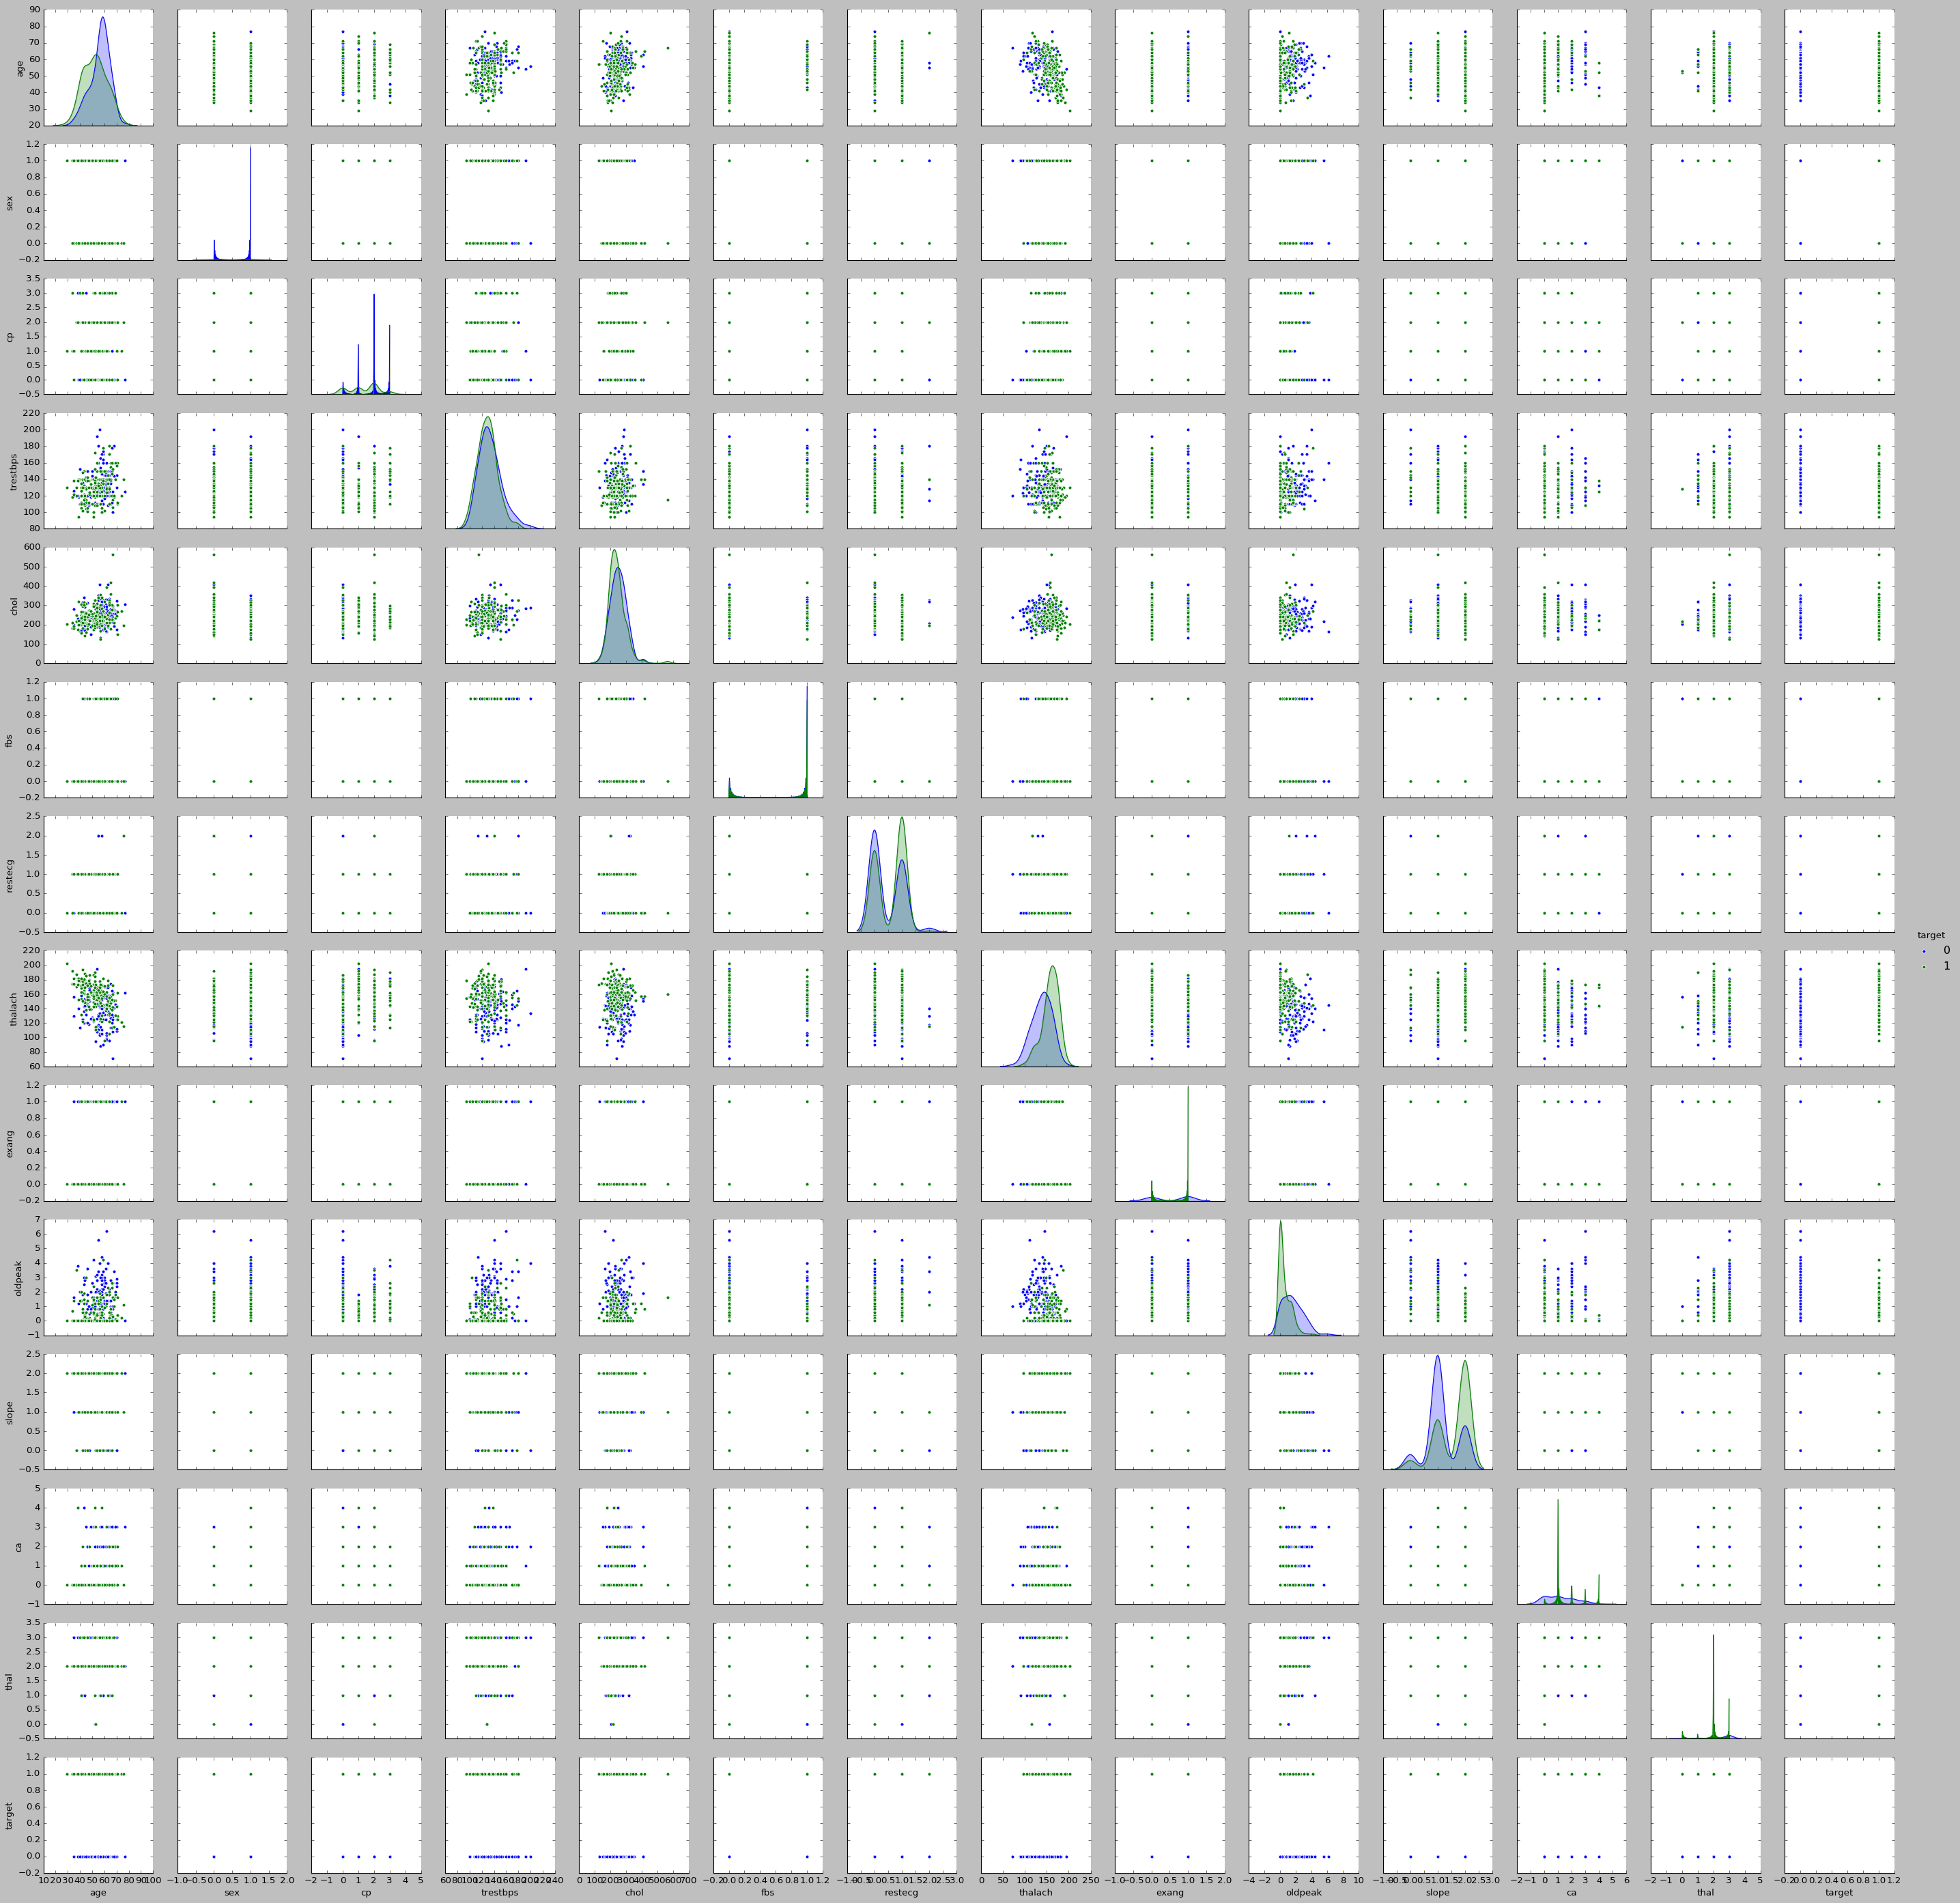

In [0]:
plt.style.use('classic')
sns.pairplot(df, hue='target')

In [0]:
pandas_profiling.ProfileReport(df) #exang, cp, oldpeak, thalach, ca, thal

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,14
Number of observations,303
Total Missing (%),0.0%
Total size in memory,33.3 KiB
Average record size in memory,112.4 B
Numeric,10
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


Tip: 'The Pearson correlation evaluates the linear relationship between two continuous variables. ... The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. Spearman correlation is often used to evaluate relationships involving ordinal variables.'
- https://support.minitab.com

In [0]:
type(df), df.shape

(pandas.core.frame.DataFrame, (303, 14))

In [0]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [0]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

###Feature Engineering 
*   Shuffle Data Set
*   Remove Outliers
*   One-hot-encode/label encode any features
*   Scale DataSet 
*   subset--> Principal Component Analysis


####Shuffle data set

In [0]:
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
1,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
2,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
3,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
4,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0


####Remove the outliers from each subset using Z-Score

sample is cosidered an outlier if the value is outside the third standard deviation

Z = (X - Mean) / Standard Deviation

Mean = sum(all Xi's) / (Number of Data Points in that column)

*   avg test scores
*   (80 + 90 + 86) / 3
*   85.33333333333333



Standard Deviation = sqrt(sum((each Xi - Mean)^2) / Number of Data Points in that column)


*   np.sqrt((((80-85.3)^2) + ((90-85.3)^2) + ((86-85.3)^2))/3)
*   4.109744517606903 

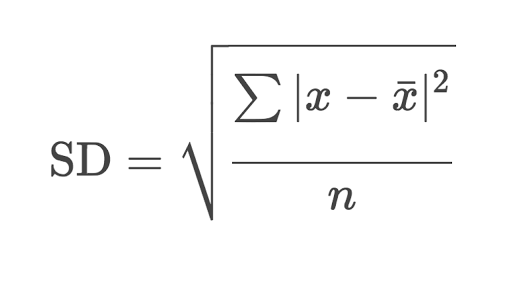

In [0]:
#Population STD 
#For Sample STD, use n-1
Image(filename="/content/standard_dev_formula.png")

In [0]:
def extract_outliers(dataframe):
    global subset
    subset = dataframe[abs(zscore(dataframe) < 3).all(axis=1)]
    subset.reset_index(inplace=True, drop=True)

In [0]:
extract_outliers(df)
df_liers = subset
df_liers.head(), type(df_liers), df_liers.shape

(   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
 0   45    1   0       115   260    0  ...      0      0.0      2   0     2       1
 1   62    1   1       120   281    0  ...      0      1.4      1   1     3       0
 2   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
 3   52    1   1       134   201    0  ...      0      0.8      2   1     2       1
 4   60    1   0       117   230    1  ...      1      1.4      2   2     3       0
 
 [5 rows x 14 columns], pandas.core.frame.DataFrame, (290, 14))

In [0]:
df_liers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
1,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
2,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
3,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
4,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
286,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
287,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
288,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1


In [0]:
target_label = df_liers['target']
target_label.head(), target_label.value_counts()

(0    1
 1    0
 2    0
 3    1
 4    0
 Name: target, dtype: int64, 1    159
 0    131
 Name: target, dtype: int64)

In [0]:
target_label.value_counts() #label with outliers removed

1    159
0    131
Name: target, dtype: int64

In [0]:
df_liers = df_liers.drop('target', axis='columns') #features with outliers removed

In [0]:
df_liers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,45,1,0,115,260,0,0,185,0,0.0,2,0,2
1,62,1,1,120,281,0,0,103,0,1.4,1,1,3
2,68,1,0,144,193,1,1,141,0,3.4,1,2,3
3,52,1,1,134,201,0,1,158,0,0.8,2,1,2
4,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,60,0,2,120,178,1,1,96,0,0.0,2,0,2
286,42,0,2,120,209,0,1,173,0,0.0,1,0,2
287,63,0,2,135,252,0,0,172,0,0.0,2,0,2
288,68,0,2,120,211,0,0,115,0,1.5,1,0,2


####We have 8 categorical features : ['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'ca', 'thal']


Let's one-hot-encode/label-encode the respective features

In [0]:
#1-male, 0-female
sex = df_liers['sex']
sex = pd.get_dummies(sex)
sex.columns = ['female', 'male']
sex.head()

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [0]:
#cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
cp = df_liers['cp']
cp = pd.get_dummies(cp)
cp.columns = ['cp 1', 'cp 2', 'cp 3', 'cp 4']
cp.head()

,cp 1,cp 2,cp 3,cp 4
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [0]:
#fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
fbs = df_liers['fbs']
fbs = pd.get_dummies(fbs)
fbs.columns = ['fbs: False', 'fbs True']
fbs.head()

,fbs: False,fbs True
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


In [0]:
#restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
restecg = df_liers['restecg']
restecg = pd.get_dummies(restecg)
restecg.columns = ['restecg - 0', 'restecg - 1', 'restecg - 2']
restecg.head()

,restecg - 0,restecg - 1,restecg - 2
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [0]:
#exang: Exercise induced angina (1 = yes; 0 = no)
exang = df_liers['exang']
exang = pd.get_dummies(exang)
exang.columns = ['exang: no', 'exang: yes']
exang.head()

,exang: no,exang: yes
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [0]:
#slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
slope = df_liers['slope']
slope = pd.get_dummies(slope)
slope.columns = ['slope: upsloping', 'slope: flat', 'slope: downsloping']
slope.head()

,slope: upsloping,slope: flat,slope: downsloping
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


In [0]:
#ca: The number of major vessels (0-3)
ca = df_liers['ca']
ca = pd.get_dummies(ca)
ca.columns =['major vessels: 0', 'major vessels: 1', 'major vessels: 2', 'major vessels: 3']
ca.head()

,major vessels: 0,major vessels: 1,major vessels: 2,major vessels: 3
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In [0]:
df_liers.loc[df_liers['thal'] == 0] = 2

In [0]:
df_liers['thal'].value_counts()

2    164
3    108
1     18
Name: thal, dtype: int64

In [0]:
#thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
thal = df_liers['thal']
thal = pd.get_dummies(thal)
thal.columns = ['thal: Normal', 'thal: Fixed Defect', 'thal: Reversable Defect']
thal.head()

,thal: Normal,thal: Fixed Defect,thal: Reversable Defect
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


In [0]:
df_merge = df_liers.merge(sex, left_index=True, right_index=True)
df_merge = df_merge.merge(cp, left_index=True, right_index=True)
df_merge = df_merge.merge(fbs,left_index=True, right_index=True)
df_merge = df_merge.merge(restecg, right_index=True, left_index=True)
df_merge = df_merge.merge(exang, right_index=True, left_index=True)
df_merge = df_merge.merge(slope, right_index=True, left_index=True)
df_merge = df_merge.merge(ca, right_index=True, left_index=True)
df_merge = df_merge.merge(thal, right_index=True, left_index=True)
df_merge = df_merge.merge(target_label, right_index=True, left_index=True)
df_merge.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,female,male,cp 1,cp 2,cp 3,cp 4,fbs: False,fbs True,restecg - 0,restecg - 1,restecg - 2,exang: no,exang: yes,slope: upsloping,slope: flat,slope: downsloping,major vessels: 0,major vessels: 1,major vessels: 2,major vessels: 3,thal: Normal,thal: Fixed Defect,thal: Reversable Defect,target
0,45,1,0,115,260,0,0,185,0,0.0,2,0,2,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1
1,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,52,1,1,134,201,0,1,158,0,0.8,2,1,2,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
4,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [0]:
df_merge #shape of dataframe with added features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,female,male,cp 1,cp 2,cp 3,cp 4,fbs: False,fbs True,restecg - 0,restecg - 1,restecg - 2,exang: no,exang: yes,slope: upsloping,slope: flat,slope: downsloping,major vessels: 0,major vessels: 1,major vessels: 2,major vessels: 3,thal: Normal,thal: Fixed Defect,thal: Reversable Defect,target
0,45,1,0,115,260,0,0,185,0,0.0,2,0,2,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1
1,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,52,1,1,134,201,0,1,158,0,0.8,2,1,2,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
4,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1
286,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1
287,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1
288,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1


In [0]:
df_fe = df_merge.drop(df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']],axis='columns')
df_fe.head()

,age,trestbps,chol,thalach,oldpeak,female,male,cp 1,cp 2,cp 3,cp 4,fbs: False,fbs True,restecg - 0,restecg - 1,restecg - 2,exang: no,exang: yes,slope: upsloping,slope: flat,slope: downsloping,major vessels: 0,major vessels: 1,major vessels: 2,major vessels: 3,thal: Normal,thal: Fixed Defect,thal: Reversable Defect,target
0,45,115,260,185,0.0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1
1,62,120,281,103,1.4,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2,68,144,193,141,3.4,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,52,134,201,158,0.8,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
4,60,117,230,160,1.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [0]:
type(df_fe), df_fe.shape #final shape of dataframe with duplicate features dropped

(pandas.core.frame.DataFrame, (290, 29))

In [0]:
df_fe['target'].value_counts()

1    159
0    131
Name: target, dtype: int64

In [0]:
#this is our dataframe with it's final features (not including dimensionality reduction, scaling, or splitting)
df_fe.head() 

,age,trestbps,chol,thalach,oldpeak,female,male,cp 1,cp 2,cp 3,cp 4,fbs: False,fbs True,restecg - 0,restecg - 1,restecg - 2,exang: no,exang: yes,slope: upsloping,slope: flat,slope: downsloping,major vessels: 0,major vessels: 1,major vessels: 2,major vessels: 3,thal: Normal,thal: Fixed Defect,thal: Reversable Defect,target
0,45,115,260,185,0.0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1
1,62,120,281,103,1.4,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2,68,144,193,141,3.4,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,52,134,201,158,0.8,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
4,60,117,230,160,1.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [0]:
#save dataframe to csv file
#df_fe.to_csv('df_fe.csv')

####Scale entire data set

In [0]:
#scale features with a function
def scale_features(dataframe):
    global X #features (np)
    global y #label (np)
    global feats #scaled features (df)
    global label #label (series)
    feats = dataframe.drop('target', axis='columns')
    label = dataframe['target']
    scaler = StandardScaler()
    X = scaler.fit_transform(feats)
    y = np.array(label)

In [0]:
scale_features(df_fe)
scaled_X = X 
scaled_y = y
df_feats = feats
df_label = label

In [0]:
scaled_X, scaled_X.shape, type(scaled_X) #our features as an numpy array

(array([[-0.89775625, -0.75567071,  0.34514096, ..., -0.25724788,
          0.87652306, -0.77032889],
        [ 0.79476318, -0.50539146,  0.76661849, ..., -0.25724788,
         -1.14087129,  1.29814683],
        [ 1.39212298,  0.6959489 , -0.99957306, ..., -0.25724788,
         -1.14087129,  1.29814683],
        ...,
        [ 0.89432315,  0.24544626,  0.18457809, ..., -0.25724788,
          0.87652306, -0.77032889],
        [ 1.39212298, -0.50539146, -0.63830661, ..., -0.25724788,
          0.87652306, -0.77032889],
        [-0.39995642,  0.6959489 , -0.85908055, ..., -0.25724788,
         -1.14087129,  1.29814683]]), (290, 28), numpy.ndarray)

In [0]:
scaled_y, scaled_y.shape, type(scaled_y) #our label as an np array

(array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 0]), (290,), numpy.nd

In [0]:
df_feats #our features in a dataframe

,age,trestbps,chol,thalach,oldpeak,female,male,cp 1,cp 2,cp 3,cp 4,fbs: False,fbs True,restecg - 0,restecg - 1,restecg - 2,exang: no,exang: yes,slope: upsloping,slope: flat,slope: downsloping,major vessels: 0,major vessels: 1,major vessels: 2,major vessels: 3,thal: Normal,thal: Fixed Defect,thal: Reversable Defect
0,45,115,260,185,0.0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,62,120,281,103,1.4,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,68,144,193,141,3.4,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
3,52,134,201,158,0.8,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
4,60,117,230,160,1.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,60,120,178,96,0.0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
286,42,120,209,173,0.0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0
287,63,135,252,172,0.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
288,68,120,211,115,1.5,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0


In [0]:
df_label #our label as a series

0      1
1      0
2      0
3      1
4      0
      ..
285    1
286    1
287    1
288    1
289    0
Name: target, Length: 290, dtype: int64

####Dimensionality Reduction

In [0]:
#Apply dimensionality reduction with PCA and use the subset for training (along with ETC and Heatmap results)
pca = PCA(.95)
pca

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
principal_components = pca.fit_transform(scaled_X)
principal_components

array([[-1.63858696, -0.57188534, -0.25988536, ..., -0.43138235,
        -1.49019573, -0.53858411],
       [ 1.6820598 , -0.11130548,  0.11661243, ...,  0.27182069,
         0.37692291,  0.47922229],
       [ 2.86689262, -1.76140966,  2.06480328, ...,  0.47797858,
        -1.15621164,  1.06356182],
       ...,
       [-2.90292266,  1.62671764,  1.35128639, ..., -0.01460816,
         0.84024403,  0.44246449],
       [-0.95326586,  2.80874809,  1.03754881, ..., -0.09189118,
         0.61014015,  1.46803527],
       [ 2.8218866 ,  0.06678073, -1.11508833, ...,  0.15608269,
         0.31370342,  0.91457764]])

In [0]:
scaled_X.shape #before PCA --> 28 features

(290, 28)

In [0]:
principal_components.shape #after PCA --> 17 features

(290, 17)

In [0]:
principalDf = pd.DataFrame(data = principal_components
             , columns = ['principal component ' + str(i) for i in range(1,18)])

In [0]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17
0,-1.638587,-0.571885,-0.259885,-2.247015,0.995115,0.877349,-0.772039,0.121672,-0.092280,0.713736,0.784001,-0.613443,-0.206569,0.368100,-0.431382,-1.490196,-0.538584
1,1.682060,-0.111305,0.116612,-1.339953,0.050220,0.260848,2.508418,1.115053,-0.008705,0.026660,-1.875234,2.529323,-0.840109,-0.408723,0.271821,0.376923,0.479222
2,2.866893,-1.761410,2.064803,2.644767,-1.714044,-1.049601,-0.426528,2.086409,-1.383293,0.087383,1.230964,0.832772,-0.521025,-0.348779,0.477979,-1.156212,1.063562
3,-1.830219,-1.286274,-0.964267,-0.680593,-1.430672,0.539519,1.188742,1.282227,1.700962,-0.873747,-1.233803,1.024265,0.413773,-0.310406,0.320483,-0.101531,0.586000
4,2.258718,-2.568339,0.862817,1.482191,-2.862393,1.206632,-2.546359,0.502724,-0.583421,-0.322677,1.475594,0.119767,0.013419,-0.042583,1.111439,-0.023312,-0.117530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,-2.551566,-0.177885,1.814645,3.764860,-0.669592,1.839004,-0.341438,-0.488121,-0.281932,0.078881,0.458402,-0.136342,-0.106145,0.867431,-0.668960,0.636617,1.784387
286,-2.693271,1.508193,-0.818765,2.091444,0.633240,-0.373708,0.881055,-0.329021,-1.144994,0.036878,-0.112879,-0.560694,-0.285607,-0.402401,0.108431,-0.020936,-0.814455
287,-2.902923,1.626718,1.351286,-0.927765,0.141141,0.281279,0.415996,-1.232804,-0.388866,0.052691,0.832771,-0.786865,-0.675663,0.019623,-0.014608,0.840244,0.442464
288,-0.953266,2.808748,1.037549,0.901218,1.672151,0.179764,1.534265,-0.163507,-0.904600,0.036884,0.376732,-0.097948,-0.279662,-0.463572,-0.091891,0.610140,1.468035


In [0]:
type(principalDf), type(df_label)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [0]:
df_pca = pd.concat([principalDf, df_label], axis=1) #concatenate the target column to the PCA dataframe

In [0]:
#Subset A --> Our first subset for training
df_pca

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,target
0,-1.638587,-0.571885,-0.259885,-2.247015,0.995115,0.877349,-0.772039,0.121672,-0.092280,0.713736,0.784001,-0.613443,-0.206569,0.368100,-0.431382,-1.490196,-0.538584,1
1,1.682060,-0.111305,0.116612,-1.339953,0.050220,0.260848,2.508418,1.115053,-0.008705,0.026660,-1.875234,2.529323,-0.840109,-0.408723,0.271821,0.376923,0.479222,0
2,2.866893,-1.761410,2.064803,2.644767,-1.714044,-1.049601,-0.426528,2.086409,-1.383293,0.087383,1.230964,0.832772,-0.521025,-0.348779,0.477979,-1.156212,1.063562,0
3,-1.830219,-1.286274,-0.964267,-0.680593,-1.430672,0.539519,1.188742,1.282227,1.700962,-0.873747,-1.233803,1.024265,0.413773,-0.310406,0.320483,-0.101531,0.586000,1
4,2.258718,-2.568339,0.862817,1.482191,-2.862393,1.206632,-2.546359,0.502724,-0.583421,-0.322677,1.475594,0.119767,0.013419,-0.042583,1.111439,-0.023312,-0.117530,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,-2.551566,-0.177885,1.814645,3.764860,-0.669592,1.839004,-0.341438,-0.488121,-0.281932,0.078881,0.458402,-0.136342,-0.106145,0.867431,-0.668960,0.636617,1.784387,1
286,-2.693271,1.508193,-0.818765,2.091444,0.633240,-0.373708,0.881055,-0.329021,-1.144994,0.036878,-0.112879,-0.560694,-0.285607,-0.402401,0.108431,-0.020936,-0.814455,1
287,-2.902923,1.626718,1.351286,-0.927765,0.141141,0.281279,0.415996,-1.232804,-0.388866,0.052691,0.832771,-0.786865,-0.675663,0.019623,-0.014608,0.840244,0.442464,1
288,-0.953266,2.808748,1.037549,0.901218,1.672151,0.179764,1.534265,-0.163507,-0.904600,0.036884,0.376732,-0.097948,-0.279662,-0.463572,-0.091891,0.610140,1.468035,1


In [0]:
df_pca.shape

(290, 18)

In [0]:
df_pca['target'].value_counts()

1    159
0    131
Name: target, dtype: int64

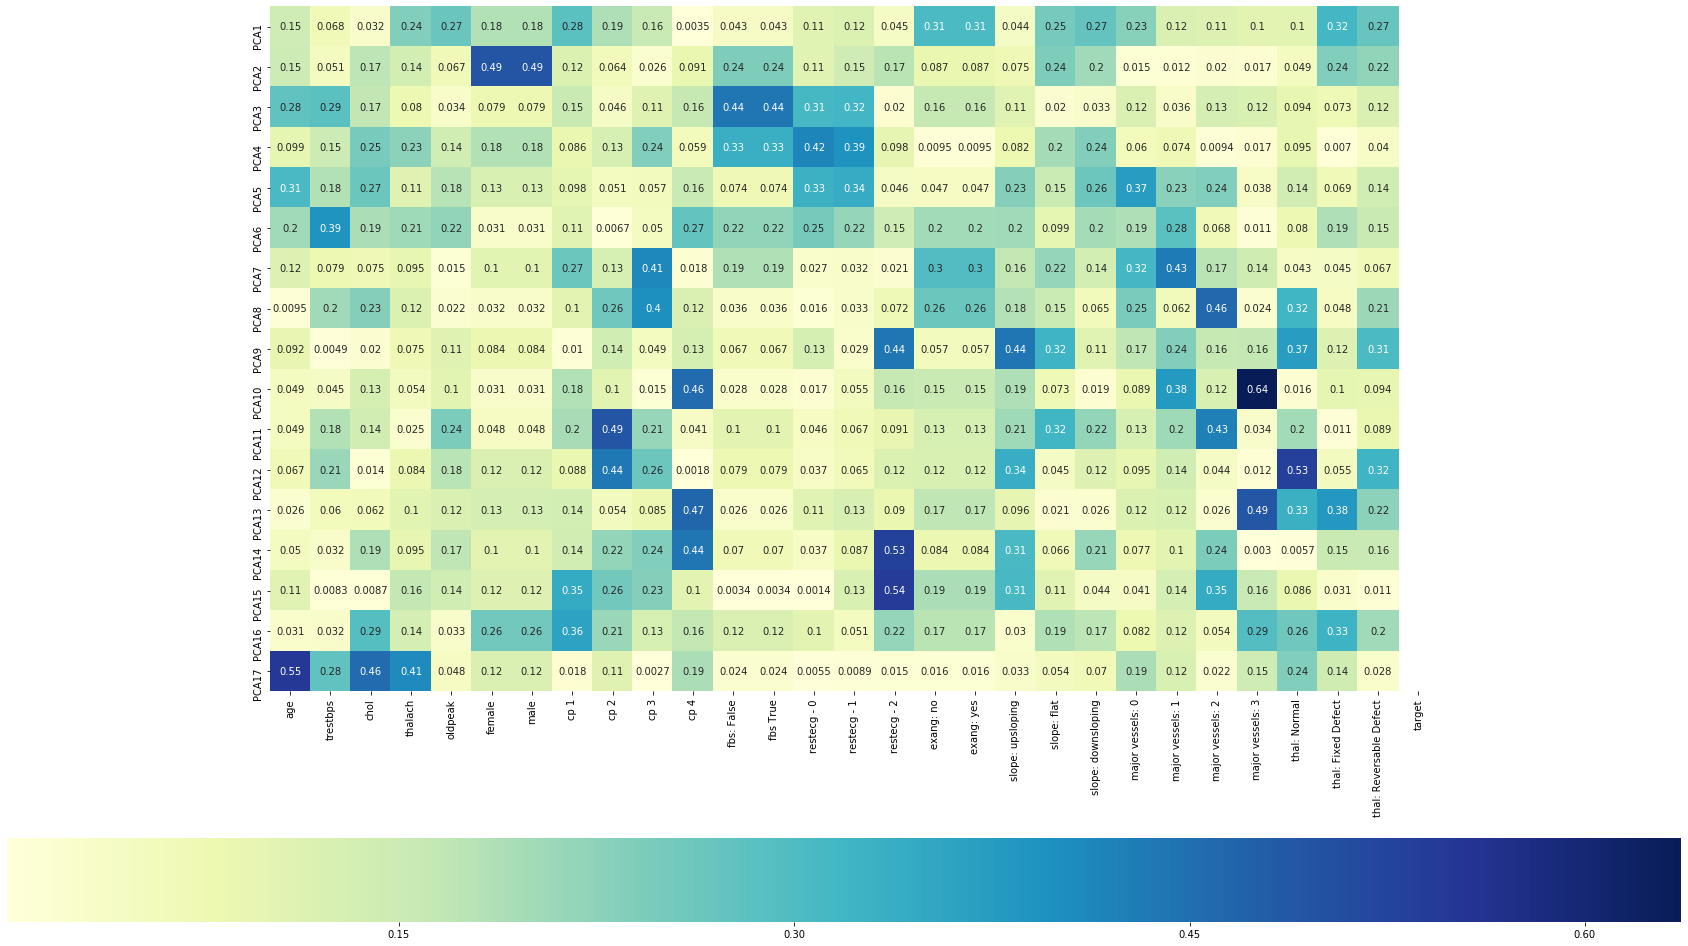

In [0]:
plt.figure(figsize=(30,18))
ax = sns.heatmap(abs(pca.components_),
                 annot=True,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(df_fe.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

###Feature Selection

*   subset--> ExtraTreesClassifier 
*   subset--> Heatmap






In [0]:
#Try out two versions of an ExtraTreesClassifier  the parameters below don't coincide with each other
#etc = ExtraTreesClassifier(n_jobs=100, random_state=5, bootstrap=True, oob_score=True)
etc = ExtraTreesClassifier(n_jobs=100, random_state=5, bootstrap=False, oob_score=False)
#etc

In [0]:
param_distributions = {'criterion': ['gini', 'entropy'], 'verbose': range(1,100), 'warm_start': [True, False], 'class_weight': ['balanced', 'balanced_subsample', None], 'max_features': ['sqrt', 'log2', None], 'min_impurity_decrease': [1e-2,1e-1,0,1,2,3]}

In [0]:
if_model = RandomizedSearchCV(etc, param_distributions=param_distributions, n_jobs=100, random_state=5, cv=10)
if_model

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators='warn',
                                                  n_jobs=100, oob_sco...
            

In [0]:
if_model.fit(scaled_X,scaled_y)

building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10building tree 5 of 10building tree 6 of 10building tree 8 of 10building tree 7 of 10


building tree 9 of 10building tree 10 of 10





/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=100)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=100)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=100)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=100)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators='warn',
                                                  n_jobs=100, oob_sco...
            

In [0]:
#ETC when bootstrap=False and oob_score=False
#We will use these parameters because it's less complex
if_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': None,
 'min_impurity_decrease': 0.01,
 'verbose': 42,
 'warm_start': False}

In [0]:
#ETC when bootstrap=True and oob_score=True
if_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': None,
 'min_impurity_decrease': 0.01,
 'verbose': 42,
 'warm_start': False}

###Feature Selection Model with Tuned Parameters


In [0]:
#Both of these TreeClassifers produce somewhat similiar results
etc = ExtraTreesClassifier(n_jobs=100, random_state=5, bootstrap=False, oob_score=False,class_weight='balanced',criterion='gini',max_features=None,min_impurity_decrease=0.01,verbose=42,warm_start=False)
#etc = ExtraTreesClassifier(n_jobs=100, random_state=5, bootstrap=True, oob_score=True,class_weight='balanced',criterion='gini',max_features=None,min_impurity_decrease=0.01,verbose=42,warm_start=False)
etc

ExtraTreesClassifier(bootstrap=False, class_weight='balanced', criterion='gini',
                     max_depth=None, max_features=None, max_leaf_nodes=None,
                     min_impurity_decrease=0.01, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators='warn',
                     n_jobs=100, oob_score=False, random_state=5, verbose=42,
                     warm_start=False)

In [0]:
scaled_X.shape, scaled_y.shape

((290, 28), (290,))

In [0]:
etc.fit(scaled_X,scaled_y)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10building tree 6 of 10building tree 9 of 10


building tree 5 of 10building tree 7 of 10building tree 10 of 10


building tree 8 of 10


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=100)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=100)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=100)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=100)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=100)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=100)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=100)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=100)]: Done   8 out of  10 | elapsed:    0.0s

ExtraTreesClassifier(bootstrap=False, class_weight='balanced', criterion='gini',
                     max_depth=None, max_features=None, max_leaf_nodes=None,
                     min_impurity_decrease=0.01, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=100,
                     oob_score=False, random_state=5, verbose=42,
                     warm_start=False)

In [0]:
imp_feats = etc.feature_importances_
imp_feats

array([0.        , 0.        , 0.        , 0.        , 0.0042248 ,
       0.        , 0.        , 0.22545039, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07276648,
       0.        , 0.15973021, 0.        , 0.        , 0.        ,
       0.        , 0.53782811, 0.        ])

In [0]:
weighted_features = pd.Series(imp_feats, index=df_feats.columns).sort_values(ascending=True)
weighted_features

age                        0.000000
thal: Normal               0.000000
major vessels: 3           0.000000
major vessels: 2           0.000000
major vessels: 1           0.000000
slope: downsloping         0.000000
slope: upsloping           0.000000
exang: yes                 0.000000
exang: no                  0.000000
restecg - 2                0.000000
restecg - 1                0.000000
fbs True                   0.000000
restecg - 0                0.000000
cp 4                       0.000000
cp 3                       0.000000
cp 2                       0.000000
male                       0.000000
female                     0.000000
thalach                    0.000000
chol                       0.000000
trestbps                   0.000000
fbs: False                 0.000000
thal: Reversable Defect    0.000000
oldpeak                    0.004225
slope: flat                0.072766
major vessels: 0           0.159730
cp 1                       0.225450
thal: Fixed Defect         0

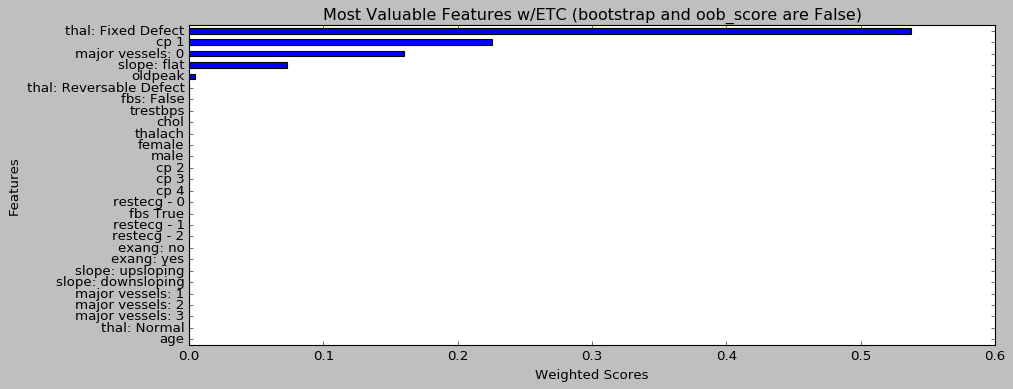

In [0]:
#ETC 1
plt.style.use('classic')
plt.figure(figsize=(13,5))
weighted_features.plot(kind='barh')
plt.title('Most Valuable Features w/ETC (bootstrap and oob_score are False)')
plt.xlabel('Weighted Scores')
plt.ylabel('Features')
plt.show()

ETC Features (Subset B) (Remember Subset A is from PCA)

*   thal: Fixed Defect
*   cp 1
*   major vessels: 0





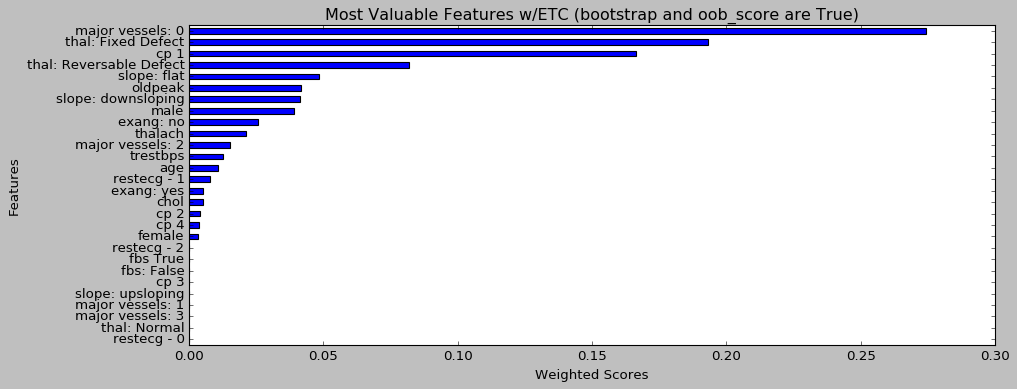

In [0]:
#ETC 2
plt.style.use('classic')
plt.figure(figsize=(13,5))
weighted_features.plot(kind='barh')
plt.title('Most Valuable Features w/ETC (bootstrap and oob_score are True)')
plt.xlabel('Weighted Scores')
plt.ylabel('Features')
plt.show()

ETC Features (This produces similar results to the first graph)
*   major vessels: 0 
*   thal: Fixed Defect
*   cp 1



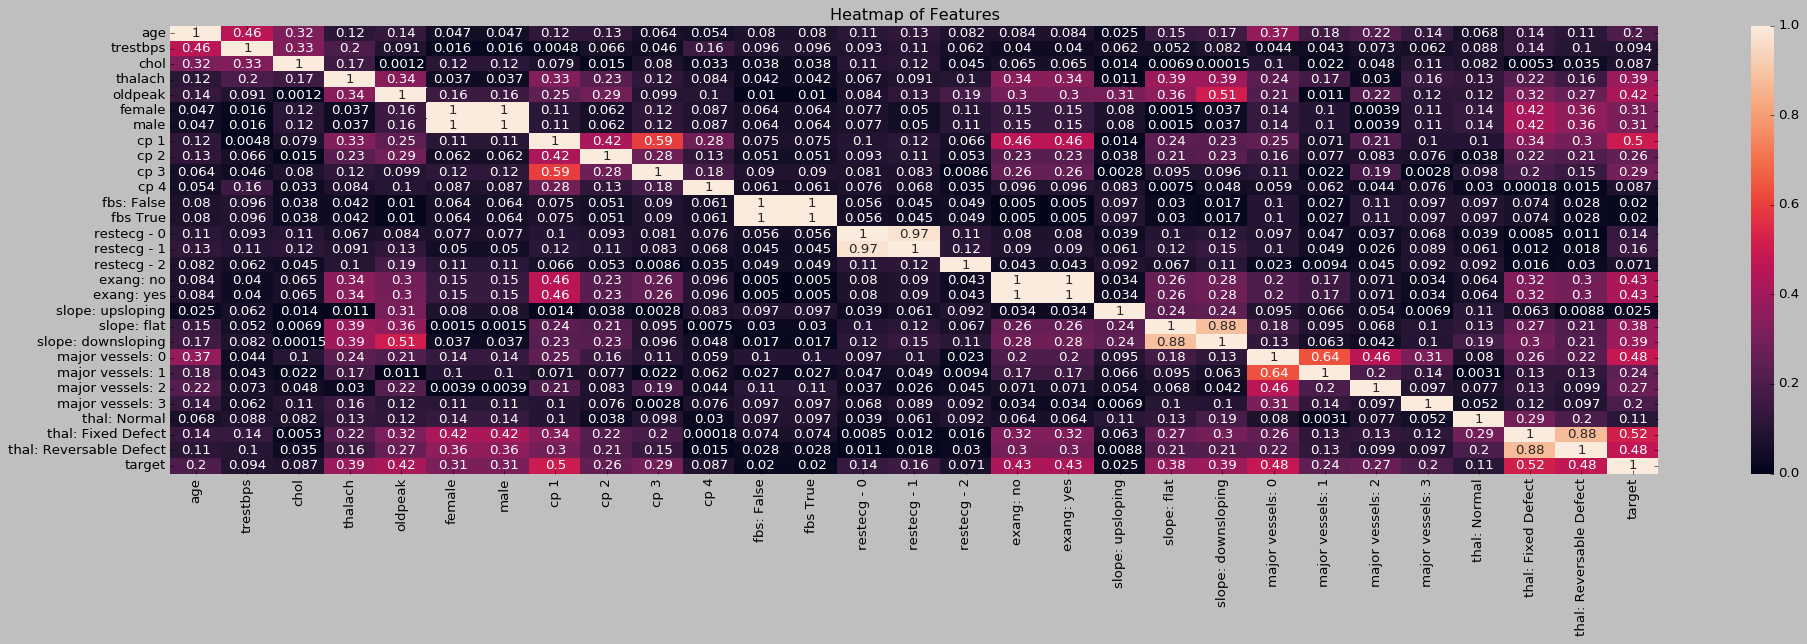

In [0]:
#Heatmap aka Pearson Correlation
df_corr = df_fe.corr()
df_corr = abs(df_corr)
plt.figure(figsize=(30,7))
sns.heatmap(df_corr, annot=True, vmin=0, vmax=1.0)
plt.title('Heatmap of Features')
plt.show()

Heatmap (threshold .45)
*   thal: Fixed Defect
*   cp 1
*   major vessels: 0





Tip: 'Correlation coefficients whose magnitude are between 0.9 and 1.0 indicate variables which can be considered very highly correlated. ... Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.' - https://www.researchgate.net

Here are all our subsets that we are going to train with 


Subset A with Dimensionality Reduction (PCA)
*   df_pca (see above pca heatmap)


Subset B 
*   thal: Fixed Defect
*   cp 1
*   major vessels: 0



###Split (and Scale) Data Set

####Our dataset after removing our outliers; we went from 303 samples to 290

In [0]:
#Create the various subsets from the results above
df_fe.head()

,age,trestbps,chol,thalach,oldpeak,female,male,cp 1,cp 2,cp 3,cp 4,fbs: False,fbs True,restecg - 0,restecg - 1,restecg - 2,exang: no,exang: yes,slope: upsloping,slope: flat,slope: downsloping,major vessels: 0,major vessels: 1,major vessels: 2,major vessels: 3,thal: Normal,thal: Fixed Defect,thal: Reversable Defect,target
0,45,115,260,185,0.0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1
1,62,120,281,103,1.4,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2,68,144,193,141,3.4,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,52,134,201,158,0.8,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
4,60,117,230,160,1.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [0]:
scaled_y

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0])

In [0]:
df_fe.shape

(290, 29)

####Split up Subsets

In [0]:
a_df = df_pca.drop('target', axis='columns')
a_df.head() #Subset A 

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17
0,-1.638587,-0.571885,-0.259885,-2.247015,0.995115,0.877349,-0.772039,0.121672,-0.092280,0.713736,0.784001,-0.613443,-0.206569,0.368100,-0.431382,-1.490196,-0.538584
1,1.682060,-0.111305,0.116612,-1.339953,0.050220,0.260848,2.508418,1.115053,-0.008705,0.026660,-1.875234,2.529323,-0.840109,-0.408723,0.271821,0.376923,0.479222
2,2.866893,-1.761410,2.064803,2.644767,-1.714044,-1.049601,-0.426528,2.086409,-1.383293,0.087383,1.230964,0.832772,-0.521025,-0.348779,0.477979,-1.156212,1.063562
3,-1.830219,-1.286274,-0.964267,-0.680593,-1.430672,0.539519,1.188742,1.282227,1.700962,-0.873747,-1.233803,1.024265,0.413773,-0.310406,0.320483,-0.101531,0.586000
4,2.258718,-2.568339,0.862817,1.482191,-2.862393,1.206632,-2.546359,0.502724,-0.583421,-0.322677,1.475594,0.119767,0.013419,-0.042583,1.111439,-0.023312,-0.117530


In [0]:
a_df.shape

(290, 17)

In [0]:
d_df = df_fe[['thal: Fixed Defect', 'cp 1', 'major vessels: 0']]
d_df.head(), d_df.shape #Subset B

(   thal: Fixed Defect  cp 1  major vessels: 0
 0                   1     1                 1
 1                   0     0                 0
 2                   0     1                 0
 3                   1     0                 0
 4                   0     1                 0, (290, 3))

####Scale subsets - 


*   Subset A was already scaled prior to PCA so no need to do it again; just convert it into a numpy array

*   Subset B contains ONLY dummy variables so no need to scale; just convert to numpy array
*   Just in case we needed to scale any subsets, I created a function for it (below)


In [0]:
#scale the subsets
def scale_subset(subset):
    global scaled_sub
    scaler = StandardScaler()
    scaled_sub = scaler.fit_transform(subset)

####Split the features and labels for training and testing



In [0]:
def train_test(subset, np_label):
    global train_X
    global test_X
    global train_y
    global test_y
    train_X, test_X, train_y, test_y = train_test_split(subset, np_label, test_size=.2,random_state=50)

In [0]:
train_test(a_df, scaled_y)
a_train_X = train_X
a_test_X = test_X
a_train_y = train_y
a_test_y = test_y
type(a_train_X), type(a_test_X), type(a_train_y), type(a_test_y)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 numpy.ndarray)

In [0]:
a_train_X.shape, a_train_y.shape, a_test_X.shape, a_test_y.shape

((232, 17), (232,), (58, 17), (58,))

In [0]:
a_train_X.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17
210,1.756245,-1.264442,-1.778963,0.873998,1.587825,-2.339839,-0.749061,-0.574534,-1.450209,-2.043817,-0.525676,0.375365,2.107417,0.897611,1.084977,0.698264,-2.142445
37,-0.978735,2.287439,-0.936301,1.663504,0.072578,-0.529333,-0.240444,0.908797,-0.693097,0.333705,-0.154554,-0.132964,-0.134602,0.445526,-1.459190,-0.701222,0.975420
99,2.012146,2.182937,1.222780,-0.241009,-0.334320,-0.539905,1.373132,0.425423,-0.700808,3.323068,0.449607,0.957752,0.547982,0.899417,-1.960182,2.037746,0.317342
88,-3.251182,-1.874157,-1.727361,-0.259011,0.349129,0.105442,-0.605067,1.163338,0.520107,0.222441,-0.900013,0.490583,0.243973,-0.168113,0.742036,0.118100,0.541561
46,-1.147293,-2.098692,3.910053,0.280024,-0.273180,2.054902,0.959578,-0.816854,0.515698,2.846873,0.560910,-0.511373,2.010198,-0.130152,0.063294,0.412344,-0.734994


In [0]:
a_train_y, a_train_y.shape

(array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]), (232,))

In [0]:
a_test_X.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17
273,-2.594129,1.339883,-0.122314,0.442922,-2.424889,0.968302,2.024765,-0.698180,0.888133,-0.904364,0.521621,-0.026681,-0.045163,-0.230337,-0.546921,0.028238,-1.315331
167,-2.621107,0.807400,-1.348301,0.689997,-0.141856,-0.141106,-1.402952,0.259910,-0.108376,0.099027,1.132647,-0.247507,-0.341662,0.874982,-0.912101,-0.254031,-0.634766
102,-2.839894,-1.071651,-0.889662,-1.092374,-0.810539,-0.721327,-0.690678,0.416449,0.736502,0.615348,-1.366122,0.529611,0.544795,-0.857930,0.557537,-0.790133,-0.249506
119,-2.020087,1.784799,0.467396,-1.357396,0.244781,0.697900,-1.090164,-0.021094,-0.324897,0.470984,0.834938,-0.308459,-0.766674,0.993097,-1.188256,-0.034487,0.320666
271,-2.878355,-1.300115,-0.738455,0.033610,-0.164199,-0.427026,0.553416,-0.968383,0.130114,0.121006,0.514705,-1.380366,0.318196,-0.475510,0.464301,-0.676358,-0.120179


In [0]:
a_test_y, a_test_y.shape

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1]), (58,))

In [0]:
train_test(d_df, scaled_y)
d_train_X = train_X
d_test_X = test_X
d_train_y = train_y
d_test_y = test_y
type(d_train_X), type(d_train_y), type(d_test_X), type(d_test_y)

(pandas.core.frame.DataFrame,
 numpy.ndarray,
 pandas.core.frame.DataFrame,
 numpy.ndarray)

In [0]:
d_train_X.shape, d_train_y.shape, d_test_X.shape, d_test_y.shape

((232, 3), (232,), (58, 3), (58,))

In [0]:
d_train_X.head()

,thal: Fixed Defect,cp 1,major vessels: 0
210,0,0,1
37,1,1,1
99,0,1,0
88,1,0,1
46,1,0,0


In [0]:
d_train_y

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [0]:
d_test_X.head()

,thal: Fixed Defect,cp 1,major vessels: 0
273,1,0,0
167,1,1,1
102,1,0,1
119,1,1,1
271,1,0,1


In [0]:
d_test_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

###Here is a function that saves the training and testing subsets to their own numpy files.

In [0]:
def save_to_np_file(filename_choice, file_name):
        np.save(filename_choice, file_name)

In [0]:
#save_to_np_file('a_train_X', a_train_X)

In [0]:
#save_to_np_file('a_train_y', a_train_y)

In [0]:
#save_to_np_file('a_test_X', a_test_X)

In [0]:
#save_to_np_file('a_test_y', a_test_y)

In [0]:
#save_to_np_file('d_train_X', d_train_X)

In [0]:
#save_to_np_file('d_train_y', d_train_y)

In [0]:
#save_to_np_file('d_test_X', d_test_X)

In [0]:
#save_to_np_file('d_test_y', d_test_y)

###(START HERE) Here is a function that loads in the training and testing subsests (numpy files)

In [0]:
def load_np_file(np_file):
    global npf
    npf = np.load(np_file)

In [5]:
load_np_file('a_train_X.npy')
a_train_X = npf
a_train_X, a_train_X.shape, type(a_train_X)

(array([[ 1.75624507, -1.26444201, -1.77896344, ...,  1.08497708,
          0.69826444, -2.14244507],
        [-0.97873522,  2.28743864, -0.93630096, ..., -1.45918964,
         -0.70122178,  0.97542018],
        [ 2.01214583,  2.18293652,  1.22278013, ..., -1.96018227,
          2.03774565,  0.31734196],
        ...,
        [-1.30200189, -0.46263274,  1.53589251, ..., -0.66796583,
          0.19197246,  0.93859726],
        [-3.07012499,  1.50082817,  0.75013464, ...,  0.05963169,
          0.70677835, -0.48290372],
        [-0.7470889 ,  0.63242569,  2.74466829, ...,  0.75441416,
          0.87241711, -0.81790335]]), (232, 17), numpy.ndarray)

In [6]:
load_np_file('a_train_y.npy')
a_train_y = npf
a_train_y, a_train_y.shape, type(a_train_y)

(array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]), (232,), numpy.ndarray)

In [7]:
load_np_file('a_test_X.npy')
a_test_X = npf
a_test_X, a_test_X.shape, type(a_test_X)

(array([[-2.59412916e+00,  1.33988310e+00, -1.22314329e-01,
          4.42922323e-01, -2.42488934e+00,  9.68301598e-01,
          2.02476458e+00, -6.98180062e-01,  8.88132976e-01,
         -9.04363615e-01,  5.21621423e-01, -2.66807267e-02,
         -4.51634982e-02, -2.30336622e-01, -5.46921195e-01,
          2.82382587e-02, -1.31533149e+00],
        [-2.62110725e+00,  8.07399509e-01, -1.34830121e+00,
          6.89997392e-01, -1.41855973e-01, -1.41106439e-01,
         -1.40295215e+00,  2.59909657e-01, -1.08375733e-01,
          9.90271806e-02,  1.13264667e+00, -2.47506939e-01,
         -3.41662397e-01,  8.74981801e-01, -9.12100895e-01,
         -2.54031440e-01, -6.34765557e-01],
        [-2.83989375e+00, -1.07165100e+00, -8.89662061e-01,
         -1.09237364e+00, -8.10538514e-01, -7.21327091e-01,
         -6.90678425e-01,  4.16448972e-01,  7.36502238e-01,
          6.15348159e-01, -1.36612179e+00,  5.29610546e-01,
          5.44795335e-01, -8.57929912e-01,  5.57537276e-01,
         -7.

In [8]:
load_np_file('a_test_y.npy')
a_test_y = npf
a_test_y, a_test_y.shape, type(a_test_y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1]), (58,), numpy.ndarray)

In [9]:
load_np_file('d_train_X.npy')
d_train_X = npf
d_train_X, d_train_X.shape, type(d_train_X)

(array([[0, 0, 1],
        [1, 1, 1],
        [0, 1, 0],
        [1, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 0],
        [1, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 1, 1],
        [1, 0, 1],
        [0, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 0],
        [1, 1, 0],
        [0, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 0],
        [1, 1, 1],
        [1, 0, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 1, 1],
        [0, 0, 1],
        [1, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 1],
        [1, 1, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [1, 0, 1],
        [0, 1, 1],
        [0, 0, 1],
        [1, 

In [10]:
load_np_file('d_train_y.npy')
d_train_y = npf
d_train_y, d_train_y.shape, type(d_train_y)

(array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]), (232,), numpy.ndarray)

In [11]:
load_np_file('d_test_X.npy')
d_test_X = npf
d_test_X, d_test_X.shape, type(d_test_X)

(array([[1, 0, 0],
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 1],
        [1, 0, 1],
        [1, 0, 1],
        [0, 1, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 1],
        [0, 0, 1],
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [1, 1, 1],
        [1, 0, 1],
        [0, 0, 0],
        [0, 0, 1],
        [1, 1, 0],
        [1, 1, 0],
        [1, 0, 1],
        [1, 1, 1],
        [0, 1, 0],
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 0],
        [0, 1, 1],
        [1, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 0],
        [1, 0, 1],
        [1, 0, 1],
        [0, 1, 1],
        [0, 0, 0],
        [1, 0, 1],
        [1, 0, 1],
        [1, 0, 1],
        [0, 1, 0],
        [1, 1, 1],
        [1, 0, 1],
        [0, 1, 0],
        [0, 

In [12]:
load_np_file('d_test_y.npy')
d_test_y = npf
d_test_y, d_test_y.shape, type(d_test_y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1]), (58,), numpy.ndarray)

#Machine Learning
	Try out various models
	Try tuning each models' hyperparameters
	Evaluate the models with metrics
	Pick a model and Tune threshold towards your particular case (e.g false negatives vs false postives)
		Instantiate model
		Instantiate K-Fold Cross Validation (60-20-20)
		Train Model
		Test the Model's Predicitive ability
		Use Metrics to evaluate


###Machine Learning Models


*   KNN
*   Logistic Regression
*   SVM
*   LinearSVC
*   Decision Tree
*   Random Forest 



###KNN - Subset D - 5FN, 2FP

In [13]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

####Create parameter grid (or param_distribution) for training on subsets 

In [0]:
#param_distributions = {'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'n_neighbors': range(3,160,2), 'weights': ['uniform', 'distance'], 'p': range(1,11), 'leaf_size': range(1,100)}
#param_grid = {'algorithm': ['kd_tree'],'leaf_size': [83],'metric': ['manhattan'],'n_neighbors': [59],'p': [1],'weights': ['distance']} #a_model params
param_grid = {'algorithm': ['ball_tree'],'leaf_size': [93],'metric': ['chebyshev'],'n_neighbors': [61],'p': [1],'weights': ['distance']} #d_model params 

####Create a 10-fold-cross-validated model to help prevent overfitting (I kept the subset with the best performance and deleted the rest - see next section)

In [34]:
#k_model = RandomizedSearchCV(knn, param_distributions=param_distributions, cv=10, n_jobs=200)
k_model = GridSearchCV(knn, param_grid=param_grid, cv=10, n_jobs=50) #a_model
k_model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=50,
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [93],
                         'metric': ['chebyshev'], 'n_neighbors': [61], 'p': [1],
                         'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

####--- a_model section

ROC Variables --> knn_1_fpr, knn_1_tpr, knn_1_thresholds



In [18]:
a_model = k_model.fit(a_train_X, a_train_y) #Training the model
a_model

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=50,
             param_grid={'algorithm': ['kd_tree'], 'leaf_size': [83],
                         'metric': ['manhattan'], 'n_neighbors': [59], 'p': [1],
                         'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
a_model.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 83,
 'metric': 'manhattan',
 'n_neighbors': 59,
 'p': 1,
 'weights': 'distance'}

In [20]:
a_pred_y = a_model.predict(a_test_X) #testing on 0.5 threshold
a_pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [21]:
accuracy_score(a_test_y, a_pred_y)

0.8448275862068966

In [22]:
confusion_matrix(a_test_y, a_pred_y)

array([[14,  3],
       [ 6, 35]])

In [25]:
knn_proba_1 = a_model.predict_proba(a_test_X)[:,1]
knn_proba_1

array([0.73470033, 0.87794193, 0.88153908, 0.84310551, 0.87733195,
       0.87212616, 0.50129903, 0.74837017, 0.74036706, 0.4528979 ,
       0.16155107, 0.85738083, 0.25489291, 0.43338867, 0.80594874,
       0.43344316, 0.53279418, 0.15972571, 0.89027246, 0.37745749,
       0.56318896, 0.44118611, 0.4109354 , 0.93293647, 0.33214265,
       0.75625682, 0.77095487, 0.26684441, 0.88434144, 0.69512359,
       0.22140073, 0.57532168, 0.91106613, 0.52129607, 0.51131969,
       0.72579548, 0.50304991, 0.22091129, 0.80753751, 0.68961174,
       0.37060973, 0.79023793, 0.87829197, 0.34024111, 0.47234811,
       0.88447237, 0.76043171, 0.60211289, 0.37072915, 0.62375481,
       0.88045461, 0.22085456, 0.23724773, 0.82924515, 0.79564884,
       0.74179095, 0.31978255, 0.64403896])

In [0]:
knn_1_fpr, knn_1_tpr, knn_1_thresholds = roc_curve(a_test_y, knn_proba_1)

In [27]:
knn_1_fpr

array([0.        , 0.        , 0.        , 0.05882353, 0.05882353,
       0.11764706, 0.11764706, 0.17647059, 0.17647059, 0.23529412,
       0.23529412, 0.29411765, 0.29411765, 0.35294118, 0.35294118,
       0.41176471, 0.41176471, 0.94117647, 0.94117647, 1.        ])

In [28]:
knn_1_tpr

array([0.        , 0.02439024, 0.6097561 , 0.6097561 , 0.73170732,
       0.73170732, 0.7804878 , 0.7804878 , 0.85365854, 0.85365854,
       0.87804878, 0.87804878, 0.90243902, 0.90243902, 0.95121951,
       0.95121951, 0.97560976, 0.97560976, 1.        , 1.        ])

In [29]:
knn_1_thresholds

array([1.93293647, 0.93293647, 0.73470033, 0.72579548, 0.60211289,
       0.57532168, 0.53279418, 0.52129607, 0.50129903, 0.47234811,
       0.4528979 , 0.44118611, 0.43344316, 0.43338867, 0.37745749,
       0.37072915, 0.37060973, 0.22085456, 0.16155107, 0.15972571])

####---d_model section
ROC Variables --> knn_2_fpr, knn_2_tpr, knn_2_thresholds



In [35]:
d_model = k_model.fit(d_train_X, d_train_y) #Training the model
d_model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=50,
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [93],
                         'metric': ['chebyshev'], 'n_neighbors': [61], 'p': [1],
                         'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
d_model.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 93,
 'metric': 'chebyshev',
 'n_neighbors': 61,
 'p': 1,
 'weights': 'distance'}

In [37]:
d_pred_y = d_model.predict(d_test_X)
d_pred_y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [38]:
accuracy_score(d_test_y, d_pred_y)

0.8793103448275862

In [39]:
confusion_matrix(d_test_y, d_pred_y)

array([[15,  2],
       [ 5, 36]])

In [46]:
knn_proba_2 = d_model.predict_proba(d_test_X)[:,1]
knn_proba_2

array([0.68181818, 0.76      , 0.93442623, 0.76      , 0.93442623,
       0.93442623, 0.24      , 0.57894737, 0.57894737, 0.57894737,
       0.02173913, 0.93442623, 0.02173913, 0.24      , 0.93442623,
       0.57894737, 0.93442623, 0.02173913, 0.93442623, 0.68181818,
       0.68181818, 0.125     , 0.76      , 0.93442623, 0.23076923,
       0.57894737, 0.125     , 0.125     , 0.93442623, 0.76      ,
       0.02173913, 0.76      , 0.93442623, 0.125     , 0.24      ,
       0.93442623, 0.57894737, 0.02173913, 0.68181818, 0.57894737,
       0.23076923, 0.93442623, 0.93442623, 0.24      , 0.23076923,
       0.93442623, 0.93442623, 0.93442623, 0.02173913, 0.76      ,
       0.93442623, 0.02173913, 0.24      , 0.76      , 0.68181818,
       0.76      , 0.24      , 0.68181818])

In [0]:
knn_2_fpr, knn_2_tpr, knn_2_thresholds = roc_curve(d_test_y, knn_proba_2)

In [48]:
knn_2_fpr

array([0.        , 0.05882353, 0.11764706, 0.11764706, 0.11764706,
       0.35294118, 0.47058824, 0.64705882, 1.        ])

In [49]:
knn_2_tpr

array([0.        , 0.3902439 , 0.56097561, 0.70731707, 0.87804878,
       0.92682927, 0.95121951, 0.97560976, 1.        ])

In [50]:
knn_2_thresholds

array([1.93442623, 0.93442623, 0.76      , 0.68181818, 0.57894737,
       0.24      , 0.23076923, 0.125     , 0.02173913])

###Logistic Regression - Subset A - 5FP, 1FP

In [72]:
logreg = LogisticRegression()
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#There are 4 param_distributions that should be tested oout with logistic regression

#param_distributions = {'C': range(1,50), 'class_weight': [None, 'balanced'], 'fit_intercept': [True, False], 'intercept_scaling': range(1,10), 'l1_ratio': [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], 'max_iter': range(95,110), 'penalty': ['l1'],'solver': ['liblinear', 'saga'], 'tol': [0.00001, 0.0001, 0.001], 'verbose': range(0,50), 'warm_start': [True, False]}
#param_distributions = {'C': range(1,50), 'class_weight': [None, 'balanced'], 'fit_intercept': [True, False], 'intercept_scaling': range(1,10), 'l1_ratio': [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], 'max_iter': range(95,110), 'penalty': ['l2'],'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'tol': [0.00001, 0.0001, 0.001], 'verbose': range(0,50), 'warm_start': [True, False]}
#param_distributions = {'C': range(1,50), 'class_weight': [None, 'balanced'], 'fit_intercept': [True, False], 'intercept_scaling': range(1,10), 'l1_ratio': [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], 'max_iter': range(95,110), 'penalty': ['elasticnet'],'solver': ['saga'], 'tol': [0.00001, 0.0001, 0.001], 'verbose': range(0,50), 'warm_start': [True, False]}
#param_distributions = {'C': range(1,50), 'class_weight': [None, 'balanced'], 'fit_intercept': [True, False], 'intercept_scaling': range(1,10), 'l1_ratio': [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], 'max_iter': range(95,110), 'penalty': ['none'],'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'tol': [0.00001, 0.0001, 0.001], 'verbose': range(0,50), 'warm_start': [True, False]}

#a_model
#param_grid 1 = 5FN, 1FP
#param_grid = {'C': [29],'class_weight': [None],'fit_intercept': [False],'intercept_scaling': [1],'l1_ratio': [1],'max_iter': [104],'penalty': ['l1'],'solver': ['liblinear'],'tol': [0.001],'verbose': [12],'warm_start': [False]}

#param_grid 2 = 5FN, 1FP
#param_grid = {'C': [43],'class_weight': [None],'fit_intercept': [False],'intercept_scaling': [2],'l1_ratio': [0.8],'max_iter': [108],'penalty': ['l2'],'solver': ['sag'],'tol': [0.0001],'verbose': [2],'warm_start': [True]}

#param_grid 3 = 5FN, 1FP --> Best performing parameters at 0.5 threshold
#param_grid = {'C': [30],'class_weight': [None],'fit_intercept': [True],'intercept_scaling': [1],'l1_ratio': [0.1],'max_iter': [100],'penalty': ['elasticnet'],'solver': ['saga'],'tol': [1e-05],'verbose': [21],'warm_start': [True]}

#param_grid 4 = 5FN, 1FP 
#param_grid = {'C': [20],'class_weight': [None],'fit_intercept': [False],'intercept_scaling': [3],'l1_ratio': [0.2],'max_iter': [105],'penalty': ['none'],'solver': ['saga'],'tol': [0.0001],'verbose': [42],'warm_start': [False]}


#d_model
#param_grid 1 = 5FN, 2FP
#param_grid  = {'C': [12],'class_weight': [None],'fit_intercept': [False],'intercept_scaling': [3],'l1_ratio': [0.4],'max_iter': [101],'penalty': ['l1'],'solver': ['liblinear'],'tol': [1e-05],'verbose': [37],'warm_start': [False]}

#param_grid 2 = 5FN, 2FP
#param_grid = {'C': [44],'class_weight': [None],'fit_intercept': [True],'intercept_scaling': [7],'l1_ratio': [0],'max_iter': [95],'penalty': ['l2'],'solver': ['sag'],'tol': [0.001],'verbose': [21],'warm_start': [True]}

#param_grid 3 = 5FN, 2FP
#param_grid = {'C': [4],'class_weight': [None],'fit_intercept': [False],'intercept_scaling': [1],'l1_ratio': [0.4],'max_iter': [101],'penalty': ['elasticnet'],'solver': ['saga'],'tol': [0.0001],'verbose': [11],'warm_start': [False]}


#param_grid 4 = 5FN, 2FP
param_grid = {'C': [22],'class_weight': ['balanced'],'fit_intercept': [True],'intercept_scaling': [4],'l1_ratio': [0.2],'max_iter': [95],'penalty': ['none'],'solver': ['saga'],'tol': [1e-05],'verbose': [48],'warm_start': [False]}




In [192]:
#k_model = RandomizedSearchCV(logreg, param_distributions=param_distributions, n_jobs=200, cv=10)
k_model = GridSearchCV(logreg, param_grid=param_grid, cv=10, n_jobs=50)
k_model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=50,
             param_grid={'C': [22], 'class_weight': ['balanced'],
                         'fit_intercept': [True], 'intercept_scaling': [4],
                         'l1_ratio': [0.2], 'max_iter': [95],
                         'penalty': ['none'], 'solver': ['saga'],
                         'tol': [1e-05], 'verbose': [48],
                

####---a_model



In [140]:
a_model = k_model.fit(a_train_X, a_train_y)
a_model

max_iter reached after 0 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Converg

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=50,
             param_grid={'C': [20], 'class_weight': [None],
                         'fit_intercept': [False], 'intercept_scaling': [3],
                         'l1_ratio': [0.2], 'max_iter': [105],
                         'penalty': ['none'], 'solver': ['saga'],
                         'tol': [0.0001], 'verbose': [42],
                   

In [76]:
#param_distribution 1
a_model.best_params_

{'C': 29,
 'class_weight': None,
 'fit_intercept': False,
 'intercept_scaling': 1,
 'l1_ratio': 1,
 'max_iter': 104,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.001,
 'verbose': 12,
 'warm_start': False}

In [77]:
a_pred_y = a_model.predict(a_test_X)
a_pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [78]:
accuracy_score(a_test_y, a_pred_y)

0.896551724137931

In [79]:
confusion_matrix(a_test_y, a_pred_y)

array([[16,  1],
       [ 5, 36]])

In [81]:
logreg_proba_1 = a_model.predict_proba(a_test_X)[:,1]
logreg_proba_1

array([0.94432737, 0.97638698, 0.89869293, 0.9635953 , 0.97744857,
       0.96733097, 0.51197633, 0.94377594, 0.68320849, 0.63467525,
       0.00893757, 0.89608907, 0.01089017, 0.12266113, 0.93749106,
       0.8828038 , 0.64033573, 0.00602597, 0.99589145, 0.3092127 ,
       0.52828851, 0.0549208 , 0.10505613, 0.98100433, 0.05685353,
       0.96074093, 0.53848875, 0.01075416, 0.97026992, 0.87293658,
       0.00155437, 0.31491078, 0.96761019, 0.25675605, 0.57650184,
       0.71390885, 0.68145929, 0.04485271, 0.97770834, 0.93235451,
       0.10029069, 0.97466879, 0.96634776, 0.12431793, 0.40467314,
       0.96843197, 0.2352455 , 0.72380293, 0.04023982, 0.60436336,
       0.95834811, 0.01753525, 0.04636905, 0.95705652, 0.85361748,
       0.71173084, 0.37849748, 0.94340859])

In [0]:
logreg_1_fpr, logreg_1_tpr, logreg_thresholds = roc_curve(a_test_y, logreg_proba_1)

In [83]:
logreg_1_fpr

array([0.        , 0.        , 0.        , 0.05882353, 0.05882353,
       0.23529412, 0.23529412, 0.29411765, 0.29411765, 0.41176471,
       0.41176471, 0.88235294, 0.88235294, 1.        ])

In [84]:
logreg_1_tpr

array([0.        , 0.02439024, 0.63414634, 0.63414634, 0.87804878,
       0.87804878, 0.90243902, 0.90243902, 0.92682927, 0.92682927,
       0.97560976, 0.97560976, 1.        , 1.        ])

In [85]:
logreg_thresholds

array([1.99589145e+00, 9.95891446e-01, 7.23802934e-01, 7.13908854e-01,
       5.11976334e-01, 3.14910782e-01, 3.09212700e-01, 2.56756049e-01,
       2.35245498e-01, 1.22661127e-01, 1.00290691e-01, 1.07541633e-02,
       8.93756619e-03, 1.55436710e-03])

In [95]:
#param_distribution 2
a_model.best_params_

{'C': 43,
 'class_weight': None,
 'fit_intercept': False,
 'intercept_scaling': 2,
 'l1_ratio': 0.8,
 'max_iter': 108,
 'penalty': 'l2',
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': True}

In [96]:
a_pred_y = a_model.predict(a_test_X)
a_pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [97]:
accuracy_score(a_test_y, a_pred_y)

0.896551724137931

In [98]:
confusion_matrix(a_test_y, a_pred_y)

array([[16,  1],
       [ 5, 36]])

In [100]:
logreg_proba_2 = a_model.predict_proba(a_test_X)[:,1]
logreg_proba_2

array([0.94479832, 0.97648882, 0.89826145, 0.96403621, 0.97767191,
       0.9675774 , 0.51208472, 0.94451326, 0.68255026, 0.63509544,
       0.00894634, 0.89587117, 0.01073677, 0.1230905 , 0.93846085,
       0.88461924, 0.64277651, 0.00599436, 0.9960015 , 0.30961793,
       0.5289773 , 0.05511563, 0.10453855, 0.98104089, 0.05635545,
       0.96130399, 0.54120816, 0.01063368, 0.97062514, 0.87424593,
       0.00154565, 0.31542852, 0.96750503, 0.25496004, 0.57898845,
       0.71425164, 0.68256311, 0.04542734, 0.97803143, 0.9335085 ,
       0.0994752 , 0.97493138, 0.96675569, 0.12395944, 0.40630848,
       0.96870566, 0.19062054, 0.72681135, 0.04025108, 0.60609135,
       0.95860784, 0.01739447, 0.04642613, 0.95750919, 0.85491457,
       0.71490988, 0.38108591, 0.94436063])

In [0]:
logreg_2_fpr, logreg_2_tpr, logreg_2_thresholds = roc_curve(a_test_y, logreg_proba_2)

In [102]:
logreg_2_fpr

array([0.        , 0.        , 0.        , 0.05882353, 0.05882353,
       0.23529412, 0.23529412, 0.29411765, 0.29411765, 0.41176471,
       0.41176471, 0.88235294, 0.88235294, 1.        ])

In [103]:
logreg_2_tpr

array([0.        , 0.02439024, 0.65853659, 0.65853659, 0.87804878,
       0.87804878, 0.90243902, 0.90243902, 0.92682927, 0.92682927,
       0.97560976, 0.97560976, 1.        , 1.        ])

In [105]:
logreg_2_thresholds

array([1.99600150e+00, 9.96001500e-01, 7.14909876e-01, 7.14251642e-01,
       5.12084719e-01, 3.15428518e-01, 3.09617934e-01, 2.54960038e-01,
       1.90620537e-01, 1.23090501e-01, 9.94752015e-02, 1.06336764e-02,
       8.94633889e-03, 1.54565365e-03])

In [110]:
#param_distribution 3
a_model.best_params_

{'C': 30,
 'class_weight': None,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.1,
 'max_iter': 100,
 'penalty': 'elasticnet',
 'solver': 'saga',
 'tol': 1e-05,
 'verbose': 21,
 'warm_start': True}

In [111]:
a_pred_y = a_model.predict(a_test_X)
a_pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [112]:
accuracy_score(a_test_y, a_pred_y)

0.896551724137931

In [113]:
confusion_matrix(a_test_y, a_pred_y)

array([[16,  1],
       [ 5, 36]])

In [114]:
logreg_proba_3 = a_model.predict_proba(a_test_X)[:,1]
logreg_proba_3

array([0.94208371, 0.9754635 , 0.89575244, 0.96264241, 0.97670989,
       0.96602007, 0.50209162, 0.94255489, 0.67712926, 0.63255505,
       0.00862114, 0.89368444, 0.01005466, 0.11842531, 0.93501999,
       0.88192333, 0.62868014, 0.00576349, 0.99577546, 0.30285455,
       0.51829818, 0.05086682, 0.10003059, 0.98025376, 0.05286765,
       0.95921586, 0.52346218, 0.00991263, 0.96892237, 0.86798791,
       0.00143678, 0.30754379, 0.96618714, 0.24241441, 0.57073573,
       0.70433685, 0.67525539, 0.04237124, 0.9769572 , 0.93105758,
       0.09341808, 0.97453066, 0.96514717, 0.11851831, 0.39418283,
       0.96732852, 0.18502554, 0.71578117, 0.03834818, 0.59625735,
       0.95721453, 0.01702689, 0.04450156, 0.95584727, 0.84687599,
       0.70454652, 0.36708619, 0.94190574])

In [0]:
logreg_3_fpr, logreg_3_tpr, logreg_3_thresholds = roc_curve(a_test_y, logreg_proba_3)

In [116]:
logreg_3_fpr

array([0.        , 0.        , 0.        , 0.05882353, 0.05882353,
       0.23529412, 0.23529412, 0.29411765, 0.29411765, 0.41176471,
       0.41176471, 0.88235294, 0.88235294, 1.        ])

In [117]:
logreg_3_tpr

array([0.        , 0.02439024, 0.65853659, 0.65853659, 0.87804878,
       0.87804878, 0.90243902, 0.90243902, 0.92682927, 0.92682927,
       0.97560976, 0.97560976, 1.        , 1.        ])

In [118]:
logreg_3_thresholds

array([1.99577546e+00, 9.95775461e-01, 7.04546522e-01, 7.04336847e-01,
       5.02091622e-01, 3.07543788e-01, 3.02854548e-01, 2.42414408e-01,
       1.85025543e-01, 1.18425312e-01, 9.34180815e-02, 9.91263207e-03,
       8.62113850e-03, 1.43678406e-03])

In [141]:
#param_distribution 4
a_model.best_params_

{'C': 20,
 'class_weight': None,
 'fit_intercept': False,
 'intercept_scaling': 3,
 'l1_ratio': 0.2,
 'max_iter': 105,
 'penalty': 'none',
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 42,
 'warm_start': False}

In [142]:
a_pred_y = a_model.predict(a_test_X)
a_pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [143]:
accuracy_score(a_test_y, a_pred_y)

0.896551724137931

In [144]:
confusion_matrix(a_test_y, a_pred_y)

array([[16,  1],
       [ 5, 36]])

In [145]:
logreg_proba_4  = a_model.predict_proba(a_test_X)[:,1]
logreg_proba_4

array([0.94458787, 0.97669762, 0.89798669, 0.96413692, 0.97759371,
       0.96771786, 0.51529053, 0.94479105, 0.68167505, 0.63516149,
       0.0088164 , 0.89575065, 0.01066879, 0.12290397, 0.93840444,
       0.88499685, 0.63991128, 0.00594406, 0.99601745, 0.30986036,
       0.52659756, 0.05399349, 0.10424803, 0.98115306, 0.05579108,
       0.96133096, 0.53750857, 0.01047866, 0.97057091, 0.87406523,
       0.00151239, 0.31396827, 0.96767242, 0.25417002, 0.5782965 ,
       0.71475731, 0.68310424, 0.04474584, 0.97808902, 0.93283235,
       0.09838903, 0.97497187, 0.96672136, 0.12445557, 0.40567977,
       0.96890927, 0.24472687, 0.72529432, 0.03954938, 0.6045879 ,
       0.95842676, 0.01730809, 0.04622855, 0.95753867, 0.85342557,
       0.71321324, 0.38009792, 0.94439974])

In [0]:
logreg_4_fpr, logreg_4_tpr, logreg_4_thresholds = roc_curve(a_test_y, logreg_proba_4)

In [147]:
logreg_4_fpr

array([0.        , 0.        , 0.        , 0.05882353, 0.05882353,
       0.23529412, 0.23529412, 0.29411765, 0.29411765, 0.41176471,
       0.41176471, 0.88235294, 0.88235294, 1.        ])

In [148]:
logreg_4_tpr

array([0.        , 0.02439024, 0.63414634, 0.63414634, 0.87804878,
       0.87804878, 0.90243902, 0.90243902, 0.92682927, 0.92682927,
       0.97560976, 0.97560976, 1.        , 1.        ])

In [149]:
logreg_4_thresholds

array([1.99601745e+00, 9.96017448e-01, 7.25294320e-01, 7.14757309e-01,
       5.15290533e-01, 3.13968271e-01, 3.09860363e-01, 2.54170020e-01,
       2.44726871e-01, 1.22903975e-01, 9.83890282e-02, 1.04786617e-02,
       8.81639992e-03, 1.51239047e-03])



####---d_model



In [193]:
d_model = k_model.fit(d_train_X, d_train_y)
d_model

convergence after 23 epochs took 0 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=50,
             param_grid={'C': [22], 'class_weight': ['balanced'],
                         'fit_intercept': [True], 'intercept_scaling': [4],
                         'l1_ratio': [0.2], 'max_iter': [95],
                         'penalty': ['none'], 'solver': ['saga'],
                         'tol': [1e-05], 'verbose': [48],
                

In [154]:
#param_distribution 1
d_model.best_params_

{'C': 12,
 'class_weight': None,
 'fit_intercept': False,
 'intercept_scaling': 3,
 'l1_ratio': 0.4,
 'max_iter': 101,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 1e-05,
 'verbose': 37,
 'warm_start': False}

In [155]:
d_pred_y = d_model.predict(d_test_X)
d_pred_y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [156]:
accuracy_score(d_test_y, d_pred_y)

0.8793103448275862

In [157]:
confusion_matrix(d_test_y, d_pred_y)

array([[15,  2],
       [ 5, 36]])

In [159]:
logreg_proba_5 = d_model.predict_proba(d_test_X)[:,1]
logreg_proba_5

array([0.78825254, 0.55799932, 0.93356018, 0.55799932, 0.93356018,
       0.93356018, 0.25324536, 0.79055674, 0.79055674, 0.79055674,
       0.08243885, 0.93356018, 0.08243885, 0.25324536, 0.93356018,
       0.79055674, 0.93356018, 0.08243885, 0.93356018, 0.78825254,
       0.78825254, 0.25063317, 0.55799932, 0.93356018, 0.5       ,
       0.79055674, 0.25063317, 0.25063317, 0.93356018, 0.55799932,
       0.08243885, 0.55799932, 0.93356018, 0.25063317, 0.25324536,
       0.93356018, 0.79055674, 0.08243885, 0.78825254, 0.79055674,
       0.5       , 0.93356018, 0.93356018, 0.25324536, 0.5       ,
       0.93356018, 0.93356018, 0.93356018, 0.08243885, 0.55799932,
       0.93356018, 0.08243885, 0.25324536, 0.55799932, 0.78825254,
       0.55799932, 0.25324536, 0.78825254])

In [0]:
logreg_5_fpr, logreg_5_tpr, logreg_5_thresholds = roc_curve(d_test_y, logreg_proba_5)

In [161]:
logreg_5_fpr

array([0.        , 0.05882353, 0.05882353, 0.05882353, 0.11764706,
       0.23529412, 0.47058824, 0.64705882, 1.        ])

In [162]:
logreg_5_tpr

array([0.        , 0.3902439 , 0.56097561, 0.70731707, 0.87804878,
       0.90243902, 0.95121951, 0.97560976, 1.        ])

In [164]:
logreg_5_thresholds

array([1.93356018, 0.93356018, 0.79055674, 0.78825254, 0.55799932,
       0.5       , 0.25324536, 0.25063317, 0.08243885])

In [168]:
#param_distribution 2
d_model.best_params_

{'C': 12,
 'class_weight': None,
 'fit_intercept': False,
 'intercept_scaling': 3,
 'l1_ratio': 0.4,
 'max_iter': 101,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 1e-05,
 'verbose': 37,
 'warm_start': False}

In [169]:
d_pred_y = d_model.predict(d_test_X)
d_pred_y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [170]:
accuracy_score(d_test_y, d_pred_y)

0.8793103448275862

In [171]:
confusion_matrix(d_test_y, d_pred_y)

array([[15,  2],
       [ 5, 36]])

In [172]:
logreg_proba_6 = d_model.predict_proba(d_test_X)[:,1]
logreg_proba_6

array([0.78825254, 0.55799932, 0.93356018, 0.55799932, 0.93356018,
       0.93356018, 0.25324536, 0.79055674, 0.79055674, 0.79055674,
       0.08243885, 0.93356018, 0.08243885, 0.25324536, 0.93356018,
       0.79055674, 0.93356018, 0.08243885, 0.93356018, 0.78825254,
       0.78825254, 0.25063317, 0.55799932, 0.93356018, 0.5       ,
       0.79055674, 0.25063317, 0.25063317, 0.93356018, 0.55799932,
       0.08243885, 0.55799932, 0.93356018, 0.25063317, 0.25324536,
       0.93356018, 0.79055674, 0.08243885, 0.78825254, 0.79055674,
       0.5       , 0.93356018, 0.93356018, 0.25324536, 0.5       ,
       0.93356018, 0.93356018, 0.93356018, 0.08243885, 0.55799932,
       0.93356018, 0.08243885, 0.25324536, 0.55799932, 0.78825254,
       0.55799932, 0.25324536, 0.78825254])

In [0]:
logreg_6_fpr, logreg_6_tpr, logreg_6_thresholds = roc_curve(d_test_y, logreg_proba_6)

In [174]:
logreg_6_fpr

array([0.        , 0.05882353, 0.05882353, 0.05882353, 0.11764706,
       0.23529412, 0.47058824, 0.64705882, 1.        ])

In [175]:
logreg_6_tpr

array([0.        , 0.3902439 , 0.56097561, 0.70731707, 0.87804878,
       0.90243902, 0.95121951, 0.97560976, 1.        ])

In [176]:
logreg_6_thresholds

array([1.93356018, 0.93356018, 0.79055674, 0.78825254, 0.55799932,
       0.5       , 0.25324536, 0.25063317, 0.08243885])

In [181]:
#param_distribution 3
d_model.best_params_

{'C': 4,
 'class_weight': None,
 'fit_intercept': False,
 'intercept_scaling': 1,
 'l1_ratio': 0.4,
 'max_iter': 101,
 'penalty': 'elasticnet',
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 11,
 'warm_start': False}

In [182]:
d_pred_y = d_model.predict(d_test_X)
d_pred_y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [183]:
accuracy_score(d_test_y, d_pred_y)

0.8793103448275862

In [184]:
confusion_matrix(d_test_y, d_pred_y)

array([[15,  2],
       [ 5, 36]])

In [185]:
logreg_proba_7 = d_model.predict_proba(d_test_X)[:,1]
logreg_proba_7

array([0.78458431, 0.55789196, 0.93028208, 0.55789196, 0.93028208,
       0.93028208, 0.25731454, 0.78557335, 0.78557335, 0.78557335,
       0.08639887, 0.93028208, 0.08639887, 0.25731454, 0.93028208,
       0.78557335, 0.93028208, 0.08639887, 0.93028208, 0.78458431,
       0.78458431, 0.25619595, 0.55789196, 0.93028208, 0.5       ,
       0.78557335, 0.25619595, 0.25619595, 0.93028208, 0.55789196,
       0.08639887, 0.55789196, 0.93028208, 0.25619595, 0.25731454,
       0.93028208, 0.78557335, 0.08639887, 0.78458431, 0.78557335,
       0.5       , 0.93028208, 0.93028208, 0.25731454, 0.5       ,
       0.93028208, 0.93028208, 0.93028208, 0.08639887, 0.55789196,
       0.93028208, 0.08639887, 0.25731454, 0.55789196, 0.78458431,
       0.55789196, 0.25731454, 0.78458431])

In [0]:
logreg_7_fpr, logreg_7_tpr, logreg_7_thresholds = roc_curve(d_test_y, logreg_proba_7)

In [187]:
logreg_7_fpr

array([0.        , 0.05882353, 0.05882353, 0.05882353, 0.11764706,
       0.23529412, 0.47058824, 0.64705882, 1.        ])

In [188]:
logreg_7_tpr 

array([0.        , 0.3902439 , 0.56097561, 0.70731707, 0.87804878,
       0.90243902, 0.95121951, 0.97560976, 1.        ])

In [189]:
logreg_7_thresholds

array([1.93028208, 0.93028208, 0.78557335, 0.78458431, 0.55789196,
       0.5       , 0.25731454, 0.25619595, 0.08639887])

In [194]:
#param_distribution 4
d_model.best_params_

{'C': 22,
 'class_weight': 'balanced',
 'fit_intercept': True,
 'intercept_scaling': 4,
 'l1_ratio': 0.2,
 'max_iter': 95,
 'penalty': 'none',
 'solver': 'saga',
 'tol': 1e-05,
 'verbose': 48,
 'warm_start': False}

In [195]:
d_pred_y = d_model.predict(d_test_X)
d_pred_y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [196]:
accuracy_score(d_test_y, d_pred_y)

0.8793103448275862

In [197]:
confusion_matrix(d_test_y, d_pred_y)

array([[15,  2],
       [ 5, 36]])

In [199]:
logreg_proba_8 = d_model.predict_proba(d_test_X)[:,1]
logreg_proba_8

array([0.62607067, 0.70049475, 0.93549625, 0.70049475, 0.93549625,
       0.93549625, 0.2108137 , 0.62355645, 0.62355645, 0.62355645,
       0.02991613, 0.93549625, 0.02991613, 0.2108137 , 0.93549625,
       0.62355645, 0.93549625, 0.02991613, 0.93549625, 0.62607067,
       0.62607067, 0.21260361, 0.70049475, 0.93549625, 0.16053051,
       0.62355645, 0.21260361, 0.21260361, 0.93549625, 0.70049475,
       0.02991613, 0.70049475, 0.93549625, 0.21260361, 0.2108137 ,
       0.93549625, 0.62355645, 0.02991613, 0.62607067, 0.62355645,
       0.16053051, 0.93549625, 0.93549625, 0.2108137 , 0.16053051,
       0.93549625, 0.93549625, 0.93549625, 0.02991613, 0.70049475,
       0.93549625, 0.02991613, 0.2108137 , 0.70049475, 0.62607067,
       0.70049475, 0.2108137 , 0.62607067])

In [0]:
logreg_8_fpr, logreg_8_tpr, logreg_8_thresholds = roc_curve(d_test_y, logreg_proba_8)

In [201]:
logreg_8_fpr

array([0.        , 0.05882353, 0.11764706, 0.11764706, 0.11764706,
       0.29411765, 0.52941176, 0.64705882, 1.        ])

In [202]:
logreg_8_tpr

array([0.        , 0.3902439 , 0.56097561, 0.70731707, 0.87804878,
       0.90243902, 0.95121951, 0.97560976, 1.        ])

In [203]:
logreg_8_thresholds

array([1.93549625, 0.93549625, 0.70049475, 0.62607067, 0.62355645,
       0.21260361, 0.2108137 , 0.16053051, 0.02991613])

###SVM - Subset D - 5FN, 2FP

In [218]:
svc = SVC()
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [219]:
svc.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [0]:
#param_distribution = {'C': [.0001, .001, .01, .1, 1], 'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 'degree': range(1,11), 'gamma': ['scale', 'auto'], 'coef0': range(1,11), 'shrinking': [True, False], 'probability': [True, False], 'tol': [.00001, .0001, .001, .01, 1], 'cache_size': [1, 2, 3, 4, 5], 'class_weight': [None, 'balanced'], 'verbose': range(1,100), 'max_iter': range(-1,11), 'decision_function_shape': ['ovo', 'ovr']}

#a_model
#param_grid = {'C': [0.01],'cache_size': [5],'class_weight': [None],'coef0': [8],'decision_function_shape': ['ovr'],'degree': [2],'gamma': ['scale'],'kernel': ['sigmoid'],'max_iter': [10],'probability': [True],'shrinking': [True],'tol': [1e-05],'verbose': [67]}

#d_model
param_grid = {'C': [1],'cache_size': [4],'class_weight': ['balanced'],'coef0': [4],'decision_function_shape': ['ovo'],'degree': [4],'gamma': ['auto'],'kernel': ['linear'],'max_iter': [3],'probability': [True],'shrinking': [False],'tol': [1],'verbose': [66]}

In [237]:
#k_model = RandomizedSearchCV(svc, param_distributions=param_distribution, n_jobs=200, cv=10)
k_model = GridSearchCV(svc, param_grid=param_grid, n_jobs=50, cv=10)
k_model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=50,
             param_grid={'C': [1], 'cache_size': [4],
                         'class_weight': ['balanced'], 'coef0': [4],
                         'decision_function_shape': ['ovo'], 'degree': [4],
                         'gamma': ['auto'], 'kernel': ['linear'],
                         'max_iter': [3], 'probability': [True],
                         'shrinking': [False], 'tol': [1], 'verbose': [66]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)



####---a_model



In [224]:
a_model = k_model.fit(a_train_X, a_train_y)
a_model

[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=50,
             param_grid={'C': [0.01], 'cache_size': [5], 'class_weight': [None],
                         'coef0': [8], 'decision_function_shape': ['ovr'],
                         'degree': [2], 'gamma': ['scale'],
                         'kernel': ['sigmoid'], 'max_iter': [10],
                         'probability': [True], 'shrinking': [True],
                         'tol': [1e-05], 'verbose': [67]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [225]:
a_model.best_params_

{'C': 0.01,
 'cache_size': 5,
 'class_weight': None,
 'coef0': 8,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': 10,
 'probability': True,
 'shrinking': True,
 'tol': 1e-05,
 'verbose': 67}

In [226]:
a_pred_y = a_model.predict(a_test_X)
a_pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [227]:
accuracy_score(a_test_y, a_pred_y)

0.7758620689655172

In [228]:
confusion_matrix(a_test_y, a_pred_y)

array([[ 9,  8],
       [ 5, 36]])

In [229]:
svm_proba_1  = a_model.predict_proba(a_test_X)[:,1]
svm_proba_1

array([0.50894654, 0.50893386, 0.5088548 , 0.50898277, 0.50892025,
       0.50889587, 0.50874232, 0.50878828, 0.50881665, 0.50829715,
       0.50835278, 0.50897683, 0.50829731, 0.50860289, 0.50879603,
       0.50862375, 0.50893206, 0.50827943, 0.50890042, 0.50867141,
       0.50891717, 0.50864923, 0.50872971, 0.50892218, 0.50887863,
       0.50920334, 0.50870395, 0.50834047, 0.50894448, 0.5087304 ,
       0.50852904, 0.50866524, 0.50909603, 0.50874019, 0.50865304,
       0.50877803, 0.50880166, 0.50813804, 0.50898724, 0.50902704,
       0.50892759, 0.50889818, 0.50886236, 0.50882094, 0.50889774,
       0.5088041 , 0.50885826, 0.50877908, 0.5088595 , 0.50880977,
       0.50892957, 0.50855246, 0.50871936, 0.50894367, 0.50891446,
       0.50883835, 0.50882542, 0.50875664])

In [0]:
svm_1_fpr, svm_1_tpr, svm_1_thresholds = roc_curve(a_test_y, svm_proba_1)

In [231]:
svm_1_fpr

array([0.        , 0.        , 0.        , 0.05882353, 0.05882353,
       0.11764706, 0.11764706, 0.17647059, 0.17647059, 0.29411765,
       0.29411765, 0.35294118, 0.35294118, 0.41176471, 0.41176471,
       0.47058824, 0.47058824, 0.52941176, 0.52941176, 0.58823529,
       0.58823529, 0.76470588, 0.76470588, 0.88235294, 0.88235294,
       1.        ])

In [232]:
svm_1_tpr

array([0.        , 0.02439024, 0.46341463, 0.46341463, 0.48780488,
       0.48780488, 0.51219512, 0.51219512, 0.58536585, 0.58536585,
       0.75609756, 0.75609756, 0.80487805, 0.80487805, 0.85365854,
       0.85365854, 0.90243902, 0.90243902, 0.92682927, 0.92682927,
       0.95121951, 0.95121951, 0.97560976, 0.97560976, 1.        ,
       1.        ])

In [233]:
svm_1_thresholds

array([1.50920334, 0.50920334, 0.50889818, 0.50889774, 0.50889587,
       0.50887863, 0.50886236, 0.5088595 , 0.50883835, 0.50882094,
       0.50877908, 0.50877803, 0.50874232, 0.50874019, 0.50872971,
       0.50871936, 0.50867141, 0.50866524, 0.50865304, 0.50864923,
       0.50862375, 0.50852904, 0.50835278, 0.50829731, 0.50829715,
       0.50813804])



####---d_model



In [238]:
d_model = k_model.fit(d_train_X, d_train_y)
d_model

[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=50,
             param_grid={'C': [1], 'cache_size': [4],
                         'class_weight': ['balanced'], 'coef0': [4],
                         'decision_function_shape': ['ovo'], 'degree': [4],
                         'gamma': ['auto'], 'kernel': ['linear'],
                         'max_iter': [3], 'probability': [True],
                         'shrinking': [False], 'tol': [1], 'verbose': [66]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [239]:
d_model.best_params_

{'C': 1,
 'cache_size': 4,
 'class_weight': 'balanced',
 'coef0': 4,
 'decision_function_shape': 'ovo',
 'degree': 4,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': 3,
 'probability': True,
 'shrinking': False,
 'tol': 1,
 'verbose': 66}

In [240]:
d_pred_y = d_model.predict(d_test_X)
d_pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [254]:
accuracy_score(d_test_y, d_pred_y)

0.7068965517241379

In [255]:
confusion_matrix(d_test_y, d_pred_y)

array([[ 0, 17],
       [ 0, 41]])

In [256]:
svm_proba_2 = d_model.predict_proba(d_test_X)[:,1]
svm_proba_2

array([0.50861826, 0.50861826, 0.50861826, 0.50861826, 0.50861826,
       0.50861826, 0.50861826, 0.50861826, 0.50861826, 0.50861826,
       0.50861826, 0.50861826, 0.50861826, 0.50861826, 0.50861826,
       0.50861826, 0.50861826, 0.50861826, 0.50861826, 0.50861826,
       0.50861826, 0.50861826, 0.50861826, 0.50861826, 0.50861826,
       0.50861826, 0.50861826, 0.50861826, 0.50861826, 0.50861826,
       0.50861826, 0.50861826, 0.50861826, 0.50861826, 0.50861826,
       0.50861826, 0.50861826, 0.50861826, 0.50861826, 0.50861826,
       0.50861826, 0.50861826, 0.50861826, 0.50861826, 0.50861826,
       0.50861826, 0.50861826, 0.50861826, 0.50861826, 0.50861826,
       0.50861826, 0.50861826, 0.50861826, 0.50861826, 0.50861826,
       0.50861826, 0.50861826, 0.50861826])

In [0]:
svm_2_fpr, svm_2_tpr, svm_2_thresholds = roc_curve(d_test_y, svm_proba_2)

In [258]:
svm_2_fpr

array([0., 1.])

In [259]:
svm_2_tpr

array([0., 1.])

In [260]:
svm_2_thresholds

array([1.50861826, 0.50861826])

###Decision Tree - Subset D - 5FN, 2FP

In [329]:
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#param_distribution = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_features': [None, 'auto', 'log2', 'sqrt'], 'class_weight': [None, 'balanced']}

#a model
#param_grid = {'class_weight': [None],'criterion': ['gini'],'max_features': ['sqrt'],'splitter': ['best']}

#d model 
param_grid = {'class_weight': ['balanced'],'criterion': ['entropy'],'max_features': ['log2'],'splitter': ['best']}

In [331]:
#k_model = RandomizedSearchCV(tree, param_distributions=param_distribution, cv=10, n_jobs=200)
k_model = GridSearchCV(tree, param_grid=param_grid, cv=10, n_jobs=50)
k_model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=50,
             param_grid={'class_weight': ['balanced'], 'criterion': ['entropy'],
                         'max_features': ['log2'], 'spli


####---a_model

In [316]:
a_model = k_model.fit(a_train_X, a_train_y)
a_model

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=50,
             param_grid={'class_weight': [None], 'criterion': ['gini'],
                         'max_features': ['sqrt'], 'splitter': ['

In [317]:
a_model.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'splitter': 'best'}

In [318]:
a_pred_y = a_model.predict(a_test_X)
a_pred_y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [319]:
accuracy_score(a_test_y, a_pred_y)

0.7068965517241379

In [320]:
confusion_matrix(a_test_y, a_pred_y)

array([[14,  3],
       [14, 27]])

In [322]:
tree_proba_1  = a_model.predict_proba(a_test_X)[:,1]
tree_proba_1

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1.])

In [0]:
tree_1_fpr, tree_1_tpr, tree_1_thresholds = roc_curve(a_test_y, tree_proba_1)

In [325]:
tree_1_fpr

array([0.        , 0.17647059, 1.        ])

In [326]:
tree_1_tpr

array([0.        , 0.65853659, 1.        ])

In [327]:
tree_1_thresholds

array([2., 1., 0.])



####---d_model



In [332]:
d_model = k_model.fit(d_train_X, d_train_y)
d_model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=50,
             param_grid={'class_weight': ['balanced'], 'criterion': ['entropy'],
                         'max_features': ['log2'], 'spli

In [333]:
d_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'log2',
 'splitter': 'best'}

In [334]:
d_pred_y = d_model.predict(d_test_X)
d_pred_y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [335]:
accuracy_score(d_test_y, d_pred_y)

0.8793103448275862

In [336]:
confusion_matrix(d_test_y, d_pred_y)

array([[15,  2],
       [ 5, 36]])

In [337]:
tree_proba_2 = d_model.predict_proba(d_test_X)[:,1]
tree_proba_2

array([0.67429022, 0.75365344, 0.92179215, 0.75365344, 0.92179215,
       0.92179215, 0.23376623, 0.57051865, 0.57051865, 0.57051865,
       0.0210177 , 0.92179215, 0.0210177 , 0.23376623, 0.92179215,
       0.57051865, 0.92179215, 0.0210177 , 0.92179215, 0.67429022,
       0.67429022, 0.1212766 , 0.75365344, 0.92179215, 0.22470434,
       0.57051865, 0.1212766 , 0.1212766 , 0.92179215, 0.75365344,
       0.0210177 , 0.75365344, 0.92179215, 0.1212766 , 0.23376623,
       0.92179215, 0.57051865, 0.0210177 , 0.67429022, 0.57051865,
       0.22470434, 0.92179215, 0.92179215, 0.23376623, 0.22470434,
       0.92179215, 0.92179215, 0.92179215, 0.0210177 , 0.75365344,
       0.92179215, 0.0210177 , 0.23376623, 0.75365344, 0.67429022,
       0.75365344, 0.23376623, 0.67429022])

In [0]:
tree_2_fpr, tree_2_tpr, tree_2_thresholds = roc_curve(d_test_y, tree_proba_2)

In [339]:
tree_2_fpr

array([0.        , 0.05882353, 0.11764706, 0.11764706, 0.11764706,
       0.35294118, 0.47058824, 0.64705882, 1.        ])

In [340]:
tree_2_tpr

array([0.        , 0.3902439 , 0.56097561, 0.70731707, 0.87804878,
       0.92682927, 0.95121951, 0.97560976, 1.        ])

In [341]:
tree_2_thresholds

array([1.92179215, 0.92179215, 0.75365344, 0.67429022, 0.57051865,
       0.23376623, 0.22470434, 0.1212766 , 0.0210177 ])

###Random Forest - Subset D, 5FN, 2FP

In [394]:
forest = RandomForestClassifier()
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#param_distribution = {'n_estimators': range(10,151), 'criterion': ['gini', 'entropy'], 'max_features': [None, 'log2', 'sqrt', 'auto'], 'bootstrap': [True], 'oob_score': [True, False], 'verbose': range(1,100), 'warm_start': [True, False], 'class_weight': ['balanced', 'balanced_subsample', None]}
#param_distribution = {'n_estimators': range(10,151), 'criterion': ['gini', 'entropy'], 'max_features': [None, 'log2', 'sqrt', 'auto'], 'bootstrap': [True, False], 'oob_score': [False], 'verbose': range(1,100), 'warm_start': [True, False], 'class_weight': ['balanced', 'balanced_subsample', None]}

#a_model
#param_grid 1
#param_grid = {'bootstrap': [True],'class_weight': ['balanced_subsample'],'criterion': ['gini'],'max_features': ['auto'],'n_estimators': [128],'oob_score': [True],'verbose': [2],'warm_start': [True]}

#param_grid 2
#param_grid = {'bootstrap': [False],'class_weight': [None], 'criterion': ['gini'],'max_features': ['sqrt'],'n_estimators': [140],'oob_score': [False],'verbose': [6],'warm_start': [False]}


#d_model
#param_grid 1
#param_grid = {'bootstrap': [True],'class_weight': [None],'criterion': ['gini'],'max_features': ['auto'],'n_estimators': [110],'oob_score': [True],'verbose': [28],'warm_start': [False]}

#param_grid 2
param_grid = {'bootstrap': [True],'class_weight': ['balanced'],'criterion': ['entropy'],'max_features': ['log2'],'n_estimators': [90],'oob_score': [False],'verbose': [39],'warm_start': [False]}

In [410]:
#k_model = RandomizedSearchCV(forest, param_distributions=param_distribution, cv=10, n_jobs=100)
k_model = GridSearchCV(forest, param_grid=param_grid, cv=10, n_jobs=50)
k_model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii



####---a_model



In [383]:
a_model = k_model.fit(a_train_X, a_train_y)
a_model

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 140
building tree 2 of 140
building tree 3 of 140
building tree 4 of 140
building tree 5 of 140
building tree 6 of 140
building tree 7 of 140
building tree 8 of 140
building tree 9 of 140
building tree 10 of 140
building tree 11 of 140
building tree 12 of 140
building tree 13 of 140
building tree 14 of 140
building tree 15 of 140
building tree 16 of 140
building tree 17 of 140
building tree 18 of 140
building tree 19 of 140
building tree 20 of 140
building tree 21 of 140
building tree 22 of 140
building tree 23 of 140
building tree 24 of 140
building tree 25 of 140
building tree 26 of 140
building tree 27 of 140
building tree 28 of 140
building tree 29 of 140
building tree 30 of 140
building tree 31 of 140
building tree 32 of 140
building tree 33 of 140
building tree 34 of 140
building tree 35 of 140
building tree 36 of 140
building tree 37 of 140
building tree 38 of 140
building tree 39 of 140
building tree 40 of 140
building tree 41 of 140
building tree 42 of 140
b

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [368]:
#param_distribution 1
a_model.best_params_

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 128,
 'oob_score': True,
 'verbose': 2,
 'warm_start': True}

In [369]:
a_pred_y = a_model.predict(a_test_X)
a_pred_y

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:    0.0s finished


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [370]:
accuracy_score(a_test_y, a_pred_y)

0.7931034482758621

In [371]:
confusion_matrix(a_test_y, a_pred_y)

array([[16,  1],
       [11, 30]])

In [372]:
forest_proba_1 = a_model.predict_proba(a_test_X)[:,1]
forest_proba_1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:    0.0s finished


array([0.9375   , 0.84375  , 0.890625 , 0.7734375, 0.9140625, 0.8046875,
       0.34375  , 0.7734375, 0.5703125, 0.3671875, 0.0234375, 0.9609375,
       0.1953125, 0.359375 , 0.9296875, 0.5625   , 0.359375 , 0.0234375,
       0.84375  , 0.453125 , 0.4375   , 0.140625 , 0.2421875, 0.9921875,
       0.0703125, 0.6640625, 0.703125 , 0.1171875, 0.953125 , 0.6484375,
       0.03125  , 0.3515625, 0.84375  , 0.34375  , 0.390625 , 0.7109375,
       0.5859375, 0.15625  , 0.921875 , 0.5546875, 0.1171875, 0.828125 ,
       0.6015625, 0.125    , 0.25     , 0.921875 , 0.46875  , 0.3046875,
       0.140625 , 0.6328125, 0.8515625, 0.03125  , 0.2109375, 0.7578125,
       0.7890625, 0.8203125, 0.3125   , 0.671875 ])

In [0]:
forest_1_fpr, forest_1_tpr, forest_1_thresholds = roc_curve(a_test_y, forest_proba_1)

In [374]:
forest_1_fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05882353,
       0.05882353, 0.11764706, 0.17647059, 0.23529412, 0.29411765,
       0.29411765, 0.35294118, 0.35294118, 0.52941176, 0.64705882,
       0.70588235, 0.76470588, 0.82352941, 0.94117647, 1.        ])

In [375]:
forest_1_tpr

array([0.        , 0.02439024, 0.12195122, 0.17073171, 0.24390244,
       0.31707317, 0.41463415, 0.46341463, 0.48780488, 0.48780488,
       0.85365854, 0.87804878, 0.87804878, 0.90243902, 0.90243902,
       0.92682927, 0.92682927, 0.95121951, 0.95121951, 0.95121951,
       0.95121951, 0.97560976, 0.97560976, 0.97560976, 1.        ])

In [378]:
forest_1_thresholds

array([1.9921875, 0.9921875, 0.9296875, 0.921875 , 0.8515625, 0.84375  ,
       0.7890625, 0.7734375, 0.7578125, 0.7109375, 0.3671875, 0.359375 ,
       0.3515625, 0.34375  , 0.3125   , 0.3046875, 0.25     , 0.2421875,
       0.15625  , 0.140625 , 0.125    , 0.1171875, 0.0703125, 0.03125  ,
       0.0234375])

In [384]:
#param_distribution 2
a_model.best_params_

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 140,
 'oob_score': False,
 'verbose': 6,
 'warm_start': False}

In [385]:
a_pred_y = a_model.predict(a_test_X)
a_pred_y

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [386]:
accuracy_score(a_test_y, a_pred_y)

0.7586206896551724

In [387]:
confusion_matrix(a_test_y, a_pred_y)

array([[14,  3],
       [11, 30]])

In [388]:
forest_proba_2 = a_model.predict_proba(a_test_X)[:,1]
forest_proba_2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished


array([0.9       , 0.87857143, 0.89285714, 0.63571429, 0.97857143,
       0.77857143, 0.25714286, 0.72857143, 0.58571429, 0.34285714,
       0.01428571, 0.95714286, 0.18571429, 0.55      , 0.97857143,
       0.62142857, 0.37857143, 0.01428571, 0.87857143, 0.42142857,
       0.27142857, 0.17857143, 0.35      , 0.99285714, 0.05714286,
       0.61428571, 0.71428571, 0.06428571, 0.98571429, 0.57142857,
       0.02142857, 0.52142857, 0.77857143, 0.32857143, 0.42857143,
       0.75      , 0.54285714, 0.12142857, 0.92857143, 0.60714286,
       0.06428571, 0.74285714, 0.53571429, 0.08571429, 0.3       ,
       0.96428571, 0.49285714, 0.31428571, 0.11428571, 0.62857143,
       0.83571429, 0.06428571, 0.15      , 0.66428571, 0.78571429,
       0.95      , 0.40714286, 0.75714286])

In [0]:
forest_2_fpr, forest_2_tpr, forest_2_thresholds = roc_curve(a_test_y, forest_proba_2)

In [390]:
forest_2_fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05882353,
       0.05882353, 0.11764706, 0.11764706, 0.17647059, 0.17647059,
       0.23529412, 0.23529412, 0.29411765, 0.29411765, 0.35294118,
       0.35294118, 0.70588235, 0.82352941, 0.94117647, 1.        ])

In [391]:
forest_2_tpr

array([0.        , 0.02439024, 0.04878049, 0.09756098, 0.24390244,
       0.29268293, 0.34146341, 0.3902439 , 0.41463415, 0.41463415,
       0.68292683, 0.68292683, 0.73170732, 0.73170732, 0.80487805,
       0.80487805, 0.87804878, 0.87804878, 0.90243902, 0.90243902,
       0.95121951, 0.95121951, 0.97560976, 0.97560976, 1.        ])

In [392]:
forest_2_thresholds

array([1.99285714, 0.99285714, 0.98571429, 0.97857143, 0.89285714,
       0.87857143, 0.78571429, 0.77857143, 0.75714286, 0.75      ,
       0.57142857, 0.55      , 0.53571429, 0.52142857, 0.42142857,
       0.40714286, 0.34285714, 0.32857143, 0.31428571, 0.3       ,
       0.25714286, 0.08571429, 0.06428571, 0.02142857, 0.01428571])



####---d_model



In [397]:
d_model = k_model.fit(d_train_X, d_train_y)
d_model

building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [398]:
#param_distribution 1
d_model.best_params_

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 110,
 'oob_score': True,
 'verbose': 28,
 'warm_start': False}

In [399]:
d_pred_y = d_model.predict(d_test_X)
d_pred_y

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [400]:
accuracy_score(d_test_y, d_pred_y)

0.8793103448275862

In [401]:
confusion_matrix(d_test_y, d_pred_y)

array([[15,  2],
       [ 5, 36]])

In [403]:
forest_proba_3 = d_model.predict_proba(d_test_X)[:,1]
forest_proba_3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([0.68768695, 0.74626879, 0.91993297, 0.74626879, 0.91993297,
       0.91993297, 0.25209002, 0.59092646, 0.59092646, 0.59092646,
       0.02160109, 0.91993297, 0.02160109, 0.25209002, 0.91993297,
       0.59092646, 0.91993297, 0.02160109, 0.91993297, 0.68768695,
       0.68768695, 0.12870596, 0.74626879, 0.91993297, 0.22747531,
       0.59092646, 0.12870596, 0.12870596, 0.91993297, 0.74626879,
       0.02160109, 0.74626879, 0.91993297, 0.12870596, 0.25209002,
       0.91993297, 0.59092646, 0.02160109, 0.68768695, 0.59092646,
       0.22747531, 0.91993297, 0.91993297, 0.25209002, 0.22747531,
       0.91993297, 0.91993297, 0.91993297, 0.02160109, 0.74626879,
       0.91993297, 0.02160109, 0.25209002, 0.74626879, 0.68768695,
       0.74626879, 0.25209002, 0.68768695])

In [0]:
forest_3_fpr, forest_3_tpr, forest_3_thresholds = roc_curve(d_test_y, forest_proba_3)

In [405]:
forest_3_fpr

array([0.        , 0.05882353, 0.11764706, 0.11764706, 0.11764706,
       0.35294118, 0.47058824, 0.64705882, 1.        ])

In [406]:
forest_3_tpr

array([0.        , 0.3902439 , 0.56097561, 0.70731707, 0.87804878,
       0.92682927, 0.95121951, 0.97560976, 1.        ])

In [407]:
forest_3_thresholds

array([1.91993297, 0.91993297, 0.74626879, 0.68768695, 0.59092646,
       0.25209002, 0.22747531, 0.12870596, 0.02160109])

In [411]:
#param_distribution 2
d_model.best_params_

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 110,
 'oob_score': True,
 'verbose': 28,
 'warm_start': False}

In [412]:
d_pred_y = d_model.predict(d_test_X)
d_pred_y

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [413]:
accuracy_score(d_test_y, d_pred_y)

0.8793103448275862

In [414]:
confusion_matrix(d_test_y, d_pred_y)

array([[15,  2],
       [ 5, 36]])

In [415]:
forest_proba_4 = d_model.predict_proba(d_test_X)[:,1]
forest_proba_4

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([0.68768695, 0.74626879, 0.91993297, 0.74626879, 0.91993297,
       0.91993297, 0.25209002, 0.59092646, 0.59092646, 0.59092646,
       0.02160109, 0.91993297, 0.02160109, 0.25209002, 0.91993297,
       0.59092646, 0.91993297, 0.02160109, 0.91993297, 0.68768695,
       0.68768695, 0.12870596, 0.74626879, 0.91993297, 0.22747531,
       0.59092646, 0.12870596, 0.12870596, 0.91993297, 0.74626879,
       0.02160109, 0.74626879, 0.91993297, 0.12870596, 0.25209002,
       0.91993297, 0.59092646, 0.02160109, 0.68768695, 0.59092646,
       0.22747531, 0.91993297, 0.91993297, 0.25209002, 0.22747531,
       0.91993297, 0.91993297, 0.91993297, 0.02160109, 0.74626879,
       0.91993297, 0.02160109, 0.25209002, 0.74626879, 0.68768695,
       0.74626879, 0.25209002, 0.68768695])

In [0]:
forest_4_fpr, forest_4_tpr, forest_4_thresholds = roc_curve(d_test_y, forest_proba_4)

In [417]:
forest_4_fpr

array([0.        , 0.05882353, 0.11764706, 0.11764706, 0.11764706,
       0.35294118, 0.47058824, 0.64705882, 1.        ])

In [418]:
forest_4_tpr

array([0.        , 0.3902439 , 0.56097561, 0.70731707, 0.87804878,
       0.92682927, 0.95121951, 0.97560976, 1.        ])

In [419]:
forest_4_thresholds

array([1.91993297, 0.91993297, 0.74626879, 0.68768695, 0.59092646,
       0.25209002, 0.22747531, 0.12870596, 0.02160109])

#Turn results into visual plots, charts, reports, etc.

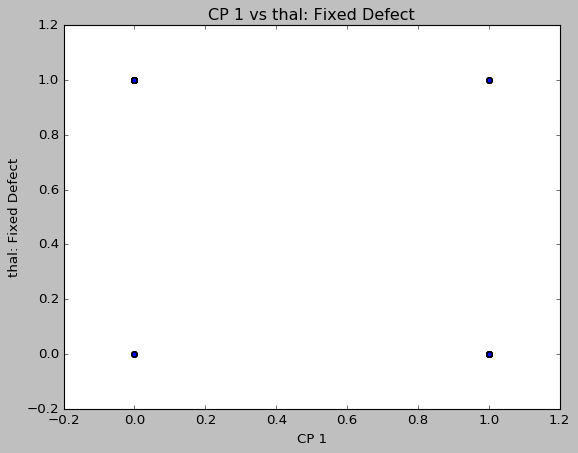

In [0]:
b_df = df_b.iloc[:,:2]
plt.scatter(b_df['cp 1'], b_df['thal: Fixed Defect'])
plt.title('CP 1 vs thal: Fixed Defect')
plt.xlabel('CP 1')
plt.ylabel('thal: Fixed Defect')
plt.show()

###Metrics Function
includes...

*   accuracy score
*   confusion matrix
*   classification report


####F1 Score is useful when both outputs have an even class distribution, however when they are uneven (ie for this problem, it's more vital to lower false negatives than false positives) precison and recall are most useful

####F1 Score - accuracy for each output
F1 Score = 2*(Recall * Precision) / (Recall + Precision)
####Recall - out of all the ACTUAL (+/-)s, how many are (+/-)
TP/(TP+FN) or TN/(TN+FP)
####Precision - out of all the PREDICTED (+/-)s, how many are (+/-)
TP/(TP+FP) or TN/(TN+FN)

In [0]:
def metric_scores(test_set, pred_set, subset_name, algo_name, params, notes):
    print(f'Algorithm: {algo_name}')
    print(f'Best Performing Subset(s): {subset_name}')
    print(f'Parameters: {params}')
    print(f'Extra Notes: {notes} \n')
    print('Accuracy Score')
    print(accuracy_score(test_set, pred_set))
    print('\n Confusion Matrix')
    print(confusion_matrix(test_set, pred_set))
    print('\n Classification Report')
    print(classification_report(test_set, pred_set))

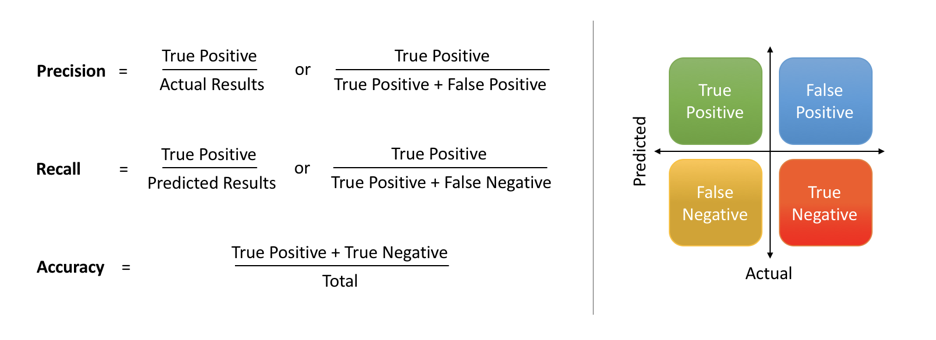

In [0]:
Image(filename='/content/pre_rec_acc.png')

In [0]:
metric_scores(a_test_y, a_pred_y, 'A', 'Logistic Regression', "{'C': [30],'class_weight': [None],'fit_intercept': [True],'intercept_scaling': [1],'l1_ratio': [0.1],'max_iter': [100],'penalty': ['elasticnet'],'solver': ['saga'],'tol': [1e-05],'verbose': [21],'warm_start': [True]}", 'There are 4 param_grids that give us the same results. I choose the 3rd one because it seems to be less complex compared to the others')

Algorithm: Logistic Regression
Best Performing Subset(s): A
Parameters: {'C': [30],'class_weight': [None],'fit_intercept': [True],'intercept_scaling': [1],'l1_ratio': [0.1],'max_iter': [100],'penalty': ['elasticnet'],'solver': ['saga'],'tol': [1e-05],'verbose': [21],'warm_start': [True]}
Extra Notes: There are 4 param_grids that give us the same results. I choose the 3rd one because it seems to be less complex compared to the others 

Accuracy Score
0.896551724137931

 Confusion Matrix
[[16  1]
 [ 5 36]]

 Classification Report
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        17
           1       0.97      0.88      0.92        41

    accuracy                           0.90        58
   macro avg       0.87      0.91      0.88        58
weighted avg       0.91      0.90      0.90        58




*   The ROC Curve is used to visualize what threshold is best
*   The binarize function is used to actually change the threshold


*   Tip: these should be the last steps. You should focus your time on building different models and selecting the best model, therefore let's try out other models



Plot an ROC curve (performance measurement for classification problems at various thresholds) 

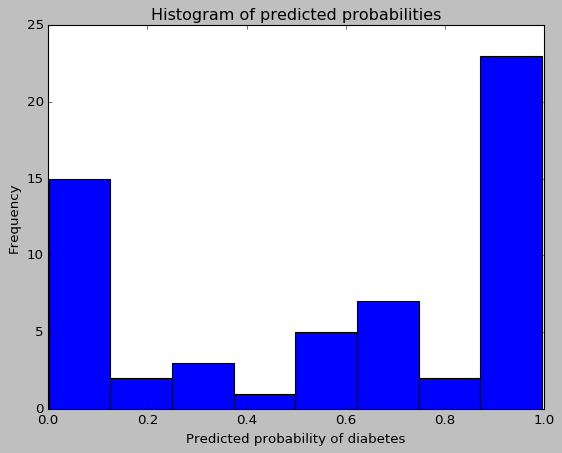

In [36]:
# histogram of predicted probabilities
plt.style.use('classic')
plt.hist(y_pred_proba, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

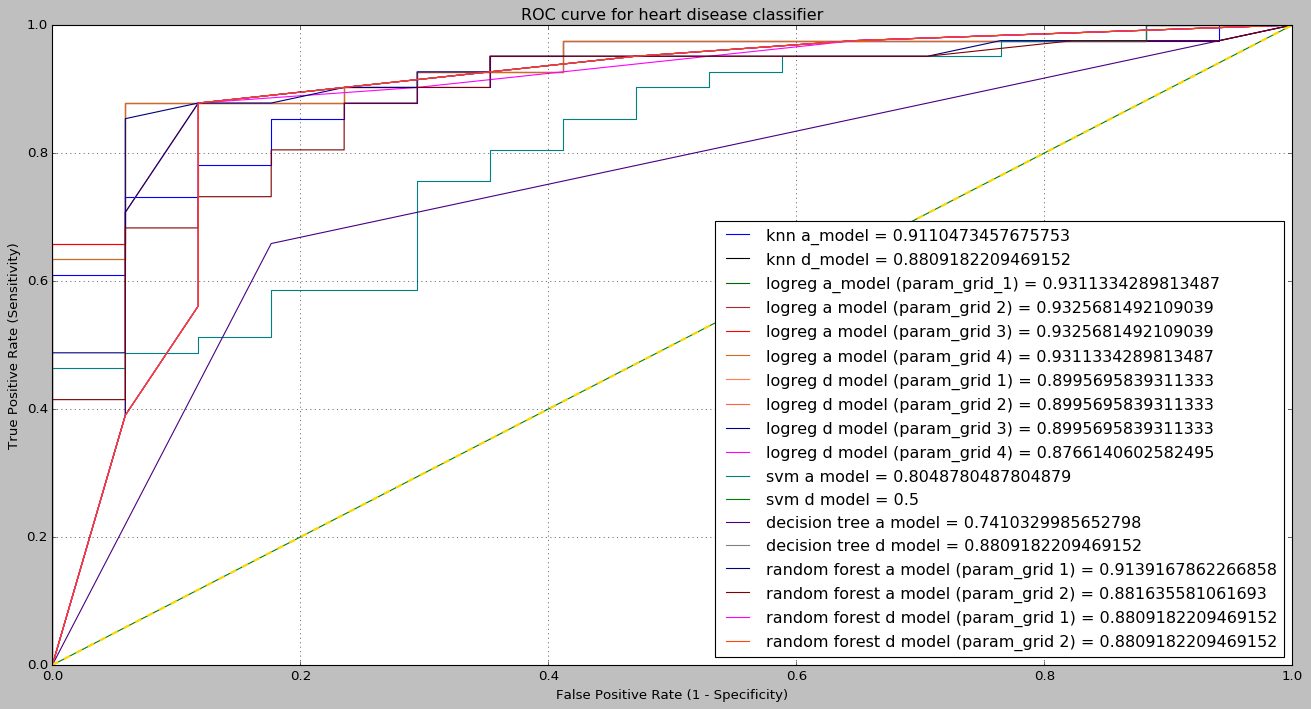

In [462]:
plt.style.use('classic')
plt.figure(figsize=(20,10))
plt.plot(knn_1_fpr, knn_1_tpr, label=f'knn a_model = {roc_auc_score(a_test_y, knn_proba_1)}', color='blue')
plt.plot(knn_2_fpr, knn_2_tpr, label=f'knn d_model = {roc_auc_score(d_test_y, knn_proba_2)}', color='black')
plt.plot(logreg_1_fpr, logreg_1_tpr, label=f'logreg a_model (param_grid_1) = {roc_auc_score(a_test_y, logreg_proba_1)}', color='darkgreen')
plt.plot(logreg_2_fpr, logreg_2_tpr, label=f'logreg a model (param_grid 2) = {roc_auc_score(a_test_y, logreg_proba_2)}', color='brown')
plt.plot(logreg_3_fpr, logreg_3_tpr, label=f'logreg a model (param_grid 3) = {roc_auc_score(a_test_y, logreg_proba_3)}', color='red')
plt.plot(logreg_4_fpr, logreg_4_tpr, label=f'logreg a model (param_grid 4) = {roc_auc_score(a_test_y, logreg_proba_4)}', color='chocolate')
plt.plot(logreg_5_fpr, logreg_5_tpr, label=f'logreg d model (param_grid 1) = {roc_auc_score(d_test_y, logreg_proba_5)}', color='coral')
plt.plot(logreg_6_fpr, logreg_6_tpr, label=f'logreg d model (param_grid 2) = {roc_auc_score(d_test_y, logreg_proba_6)}', color='tomato')
plt.plot(logreg_7_fpr, logreg_7_tpr, label=f'logreg d model (param_grid 3) = {roc_auc_score(d_test_y, logreg_proba_7)}', color='darkblue')
plt.plot(logreg_8_fpr, logreg_8_tpr, label=f'logreg d model (param_grid 4) = {roc_auc_score(d_test_y, logreg_proba_8)}', color='fuchsia')
plt.plot(svm_1_fpr, svm_1_tpr, label=f'svm a model = {roc_auc_score(a_test_y, svm_proba_1)}', color='teal')
plt.plot(svm_2_fpr, svm_2_tpr, label=f'svm d model = {roc_auc_score(d_test_y, svm_proba_2)}', color='green')
plt.plot(tree_1_fpr, tree_1_tpr, label=f'decision tree a model = {roc_auc_score(a_test_y, tree_proba_1)}', color='indigo')
plt.plot(tree_2_fpr, tree_2_tpr, label=f'decision tree d model = {roc_auc_score(d_test_y, tree_proba_2)}', color='grey')
plt.plot(forest_1_fpr, forest_1_tpr, label=f'random forest a model (param_grid 1) = {roc_auc_score(a_test_y, forest_proba_1)}', color='navy')
plt.plot(forest_2_fpr, forest_2_tpr, label=f'random forest a model (param_grid 2) = {roc_auc_score(a_test_y, forest_proba_2)}', color='maroon')
plt.plot(forest_3_fpr, forest_3_tpr, label=f'random forest d model (param_grid 1) = {roc_auc_score(d_test_y, forest_proba_3)}', color='magenta')
plt.plot(forest_4_fpr, forest_4_tpr, label=f'random forest d model (param_grid 2) = {roc_auc_score(d_test_y, forest_proba_4)}', color='orangered')
plt.plot([0, 1], [0, 1], color='gold', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc='best')
plt.title('ROC curve for heart disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

####Based on the results above, our choosen model is Logistic Regression with the 3rd parameter grid. Now let's fine tune the threshold to lower our False Negatives 

In [422]:
logreg = LogisticRegression()
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
param_grid = {'C': [30],'class_weight': [None],'fit_intercept': [True],'intercept_scaling': [1],'l1_ratio': [0.1],'max_iter': [100],'penalty': ['elasticnet'],'solver': ['saga'],'tol': [1e-05],'verbose': [21],'warm_start': [True]}

In [424]:
k_model = GridSearchCV(logreg, param_grid=param_grid, cv=10, n_jobs=10)
k_model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=10,
             param_grid={'C': [30], 'class_weight': [None],
                         'fit_intercept': [True], 'intercept_scaling': [1],
                         'l1_ratio': [0.1], 'max_iter': [100],
                         'penalty': ['elasticnet'], 'solver': ['saga'],
                         'tol': [1e-05], 'verbose': [21],
               

In [425]:
k_model.fit(a_train_X, a_train_y)

max_iter reached after 0 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=10,
             param_grid={'C': [30], 'class_weight': [None],
                         'fit_intercept': [True], 'intercept_scaling': [1],
                         'l1_ratio': [0.1], 'max_iter': [100],
                         'penalty': ['elasticnet'], 'solver': ['saga'],
                         'tol': [1e-05], 'verbose': [21],
               

In [449]:
#Tip: lowering the threshold increases the False Positives and deceases the False Negatives
#Tip: lowering the threshold increases the True Positives
 
#final_pred_y = k_model.predict(a_test_X) #threshold is 0.5
#final_pred_y = (k_model.predict_proba(a_test_X)[:,1] >= 0.5).astype(int) #this produces the same results as above
final_pred_y = (k_model.predict_proba(a_test_X)[:,1] >= 0.09).astype(int) #test your model with a desired threshold of your choice
final_pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

####Threshold of 0.5

In [438]:
accuracy_score(a_test_y, final_pred_y)

0.896551724137931

In [439]:
confusion_matrix(a_test_y, final_pred_y)

array([[16,  1],
       [ 5, 36]])

In [440]:
36/(36+5) #True Positive Rate

0.8780487804878049

In [0]:
1/(1+16) #False Positive Rate

####Threshold of .09 -> best performing 

In [443]:
accuracy_score(a_test_y, final_pred_y)

0.8620689655172413

In [444]:
confusion_matrix(a_test_y, final_pred_y)

array([[10,  7],
       [ 1, 40]])

In [445]:
40/(40+1) #True positive rate

0.975609756097561

In [446]:
7/(10+7) #false positive rate

0.4117647058823529

####Histogram of our Probabilities using Logistic Regression

In [450]:
y_pred_proba = k_model.predict_proba(a_test_X)[:,1]
y_pred_proba

array([0.94213335, 0.97537086, 0.89574826, 0.96260424, 0.97673776,
       0.96593791, 0.50049767, 0.94246094, 0.67720318, 0.63253169,
       0.0086401 , 0.89364285, 0.01002582, 0.11822721, 0.93496948,
       0.88193745, 0.62919824, 0.0057589 , 0.99577321, 0.30244493,
       0.51862605, 0.05098448, 0.09977043, 0.9801953 , 0.05283611,
       0.95919739, 0.52404421, 0.00991002, 0.96891322, 0.86791873,
       0.00143864, 0.30759242, 0.96608105, 0.24195674, 0.57086218,
       0.70362522, 0.67492547, 0.04243466, 0.97693881, 0.93136896,
       0.09343693, 0.97454927, 0.96514445, 0.11797436, 0.39396126,
       0.96722989, 0.16480276, 0.71599283, 0.03845536, 0.59644973,
       0.95726131, 0.0170081 , 0.04442945, 0.95582978, 0.84711803,
       0.70490498, 0.36708805, 0.94188822])

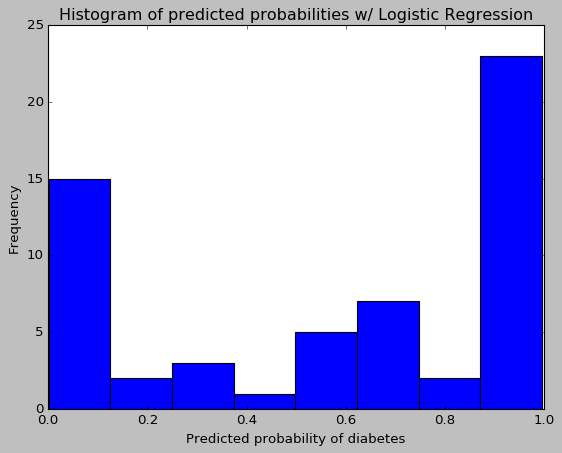

In [452]:
# histogram of predicted probabilities
plt.style.use('classic')
plt.hist(y_pred_proba, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities w/ Logistic Regression')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

#Conclusion

Our final model ia a Logistic Regression Model with the third parameter grid (see options) with the threshold lowered from 0.5 to 0.09. Our accuracy decreased from 89.6% to 86.2%, however our main focus was to lower false negatives which it did going from 5 to 1. One way we can improve this is to add more patients to our data set, so our model can train with more samples and produce even better results

#References



*   Data School, Data Analysis, Machine Learning, and Metrics, https://www.youtube.com/user/dataschool


*   scikit-learn.org, machine learning algorithms and dimensionality reduction, https://scikit-learn.org/stable/


*   Yuchao Jiang, how to tune a threshold, https://stackoverflow.com/questions/19984957/scikit-predict-default-threshold


*   Khan Academy, understanding standard deviation with formula and examples, https://www.khanacademy.org/math/probability/data-distributions-a1/summarizing-spread-distributions/a/calculating-standard-deviation-step-by-step


*   shruti saxena, providing information among precision, recall, and accuracy, https://towardsdatascience.com/precision-vs-recall-386cf9f89488





